<a href="https://colab.research.google.com/github/fyansyarafa/bank-marketing-classification/blob/main/bank_marketing_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library dan Data

In [121]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [122]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Telkom Digital Talent Incubator/Bank Marketing Classification/bank-marketing dataset/bank.csv')

In [123]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Exploratory Data Analysis

Mengecek missing values pada data dan tipe data yang tidak sesuai (jika ada):

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Missing values:

In [124]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## Deposit

Melihat kondisi fitur target deposit, seperti proporsi kategori deposit:

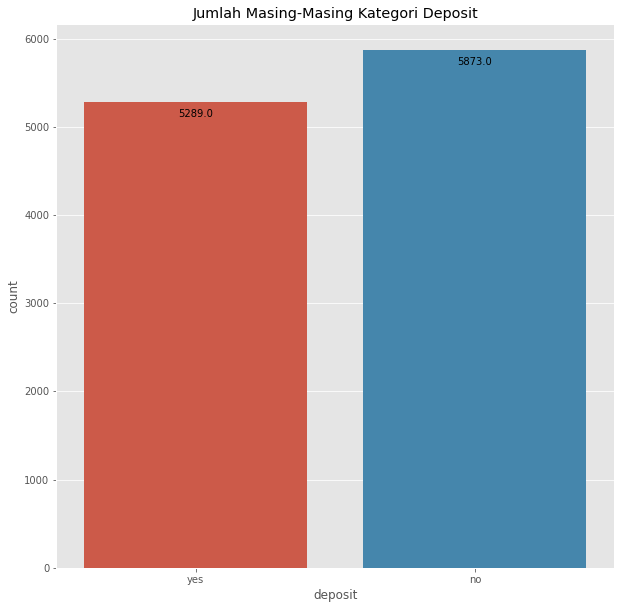

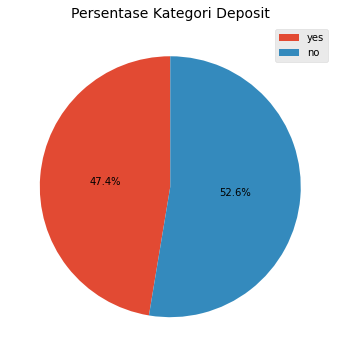

In [125]:

# countplot
splot=sns.countplot(df.deposit)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title('Jumlah Masing-Masing Kategori Deposit')

# pie chart
dict = {
    'yes' : len(df[df.deposit == 'yes']['deposit']),
    'no' : len(df[df.deposit == 'no']['deposit'])
}
ser_deposit = pd.Series(dict)
ser_deposit

pie, ax = plt.subplots(figsize=[10,6])
labels = ser_deposit.keys()
plt.pie(x=ser_deposit, autopct="%.1f%%", pctdistance=0.5, startangle=90)
plt.title("Persentase Kategori Deposit", fontsize=14)
plt.legend(labels=labels);

# subplot


Sepertinya proporsi kategori no pada fitur deposit sedikit lebih tinggi dibanding yes.

## Hubungan antar variabel numerik

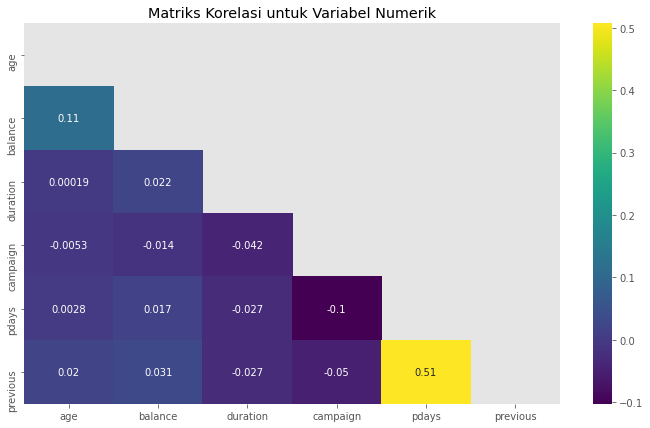

In [126]:
matrix = np.triu(df[['age','balance','duration','campaign','pdays','previous']].corr())
plt.figure(figsize=(12,7))
sns.heatmap(df[['age','balance','duration','campaign','pdays','previous']].corr(), annot=True, cmap='viridis', mask=matrix)
plt.title('Matriks Korelasi untuk Variabel Numerik');

Hanya terdapat satu hubungan yang menonjol antara `pdays` dan `previous`, dengan nilai korelasi 0.51 dengan arah positif.

## Age

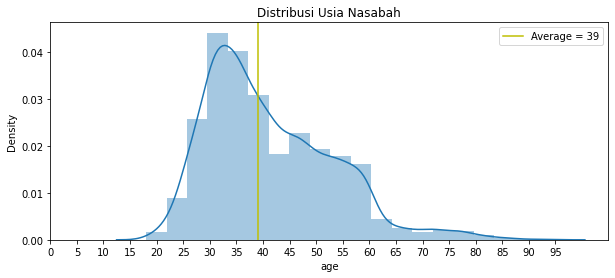

In [9]:
plt.figure(figsize=(10,4))
sns.distplot(df.age,bins=20)
plt.xticks(ticks=list(np.arange(0,100,5)))
#plt.axvline(df['age'].mean(), label='mean = {}'.format(round(df['age'].mean()),2),color='r')
plt.axvline(df['age'].median(), label='Average = {}'.format(round(df['age'].median()),2),color='y')
#plt.axvline(df['age'].mode()[0], label='mode = {}'.format(df['age'].mode()[0]),color='g')
plt.title('Distribusi Usia Nasabah')
plt.legend();

Nilai *average* dihasilkan dari nilai *median* fitur `age`, karena sepertinya terdapat *outlier* sehingga mempengaruhi nilai *mean*.

In [10]:
age_deposit_yes = df['deposit'] == 'yes'
age_deposit_yes = df.loc[age_deposit_yes]
age_deposit_yes.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [11]:
age_deposit_no = df['deposit'] == 'no'
age_deposit_no = df.loc[age_deposit_no]
age_deposit_no.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5289,57,retired,single,primary,no,604,no,no,cellular,19,nov,187,1,-1,0,unknown,no
5290,45,admin.,divorced,secondary,no,0,yes,no,cellular,17,nov,102,1,-1,0,unknown,no
5291,48,blue-collar,married,secondary,no,238,yes,yes,cellular,2,jun,118,2,81,1,success,no
5292,34,admin.,single,secondary,no,673,yes,no,cellular,29,jan,89,1,260,2,failure,no
5293,37,entrepreneur,married,tertiary,no,7944,no,no,cellular,21,nov,102,1,-1,0,unknown,no


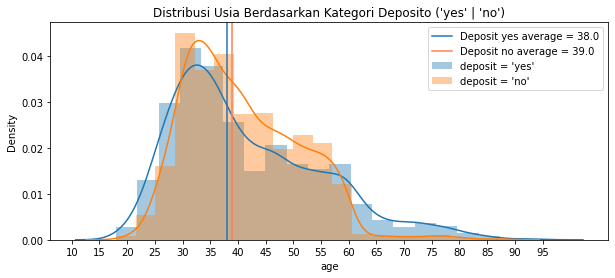

In [12]:
plt.figure(figsize=(10,4))
plt.xticks(ticks=list(np.arange(0,100,5)))
sns.distplot(age_deposit_yes.age, bins=20,label="deposit = 'yes'")
sns.distplot(age_deposit_no.age, bins = 20,label="deposit = 'no'")
plt.axvline(age_deposit_yes.age.median(),label='Deposit yes average = {}'.format(round(age_deposit_yes.age.median(),3)))
plt.axvline(age_deposit_no.age.median(),label='Deposit no average = {}'.format(round(age_deposit_no.age.median(),3)),c='coral')
plt.title("Distribusi Usia Berdasarkan Kategori Deposito ('yes' | 'no')")
plt.legend();

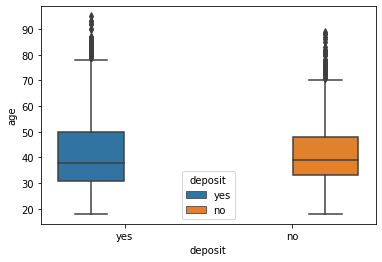

In [13]:
sns.boxplot(data=df, x = 'deposit', y = 'age', hue='deposit')

In [14]:
deleted = {'age', 'balance', 'duration', 'campaign','pdays','previous'}
list2 = [ele for ele in df.columns if ele not in deleted]


In [15]:
age_to_cat = df[list2]
age_to_cat['age'] = df['age']
age_to_cat.head()

,job,marital,education,default,housing,loan,contact,day,month,poutcome,deposit,age
0,admin.,married,secondary,no,yes,no,unknown,5,may,unknown,yes,59
1,admin.,married,secondary,no,no,no,unknown,5,may,unknown,yes,56
2,technician,married,secondary,no,yes,no,unknown,5,may,unknown,yes,41
3,services,married,secondary,no,yes,no,unknown,5,may,unknown,yes,55
4,admin.,married,tertiary,no,no,no,unknown,5,may,unknown,yes,54


### Age vs variabel-variabel kategorik

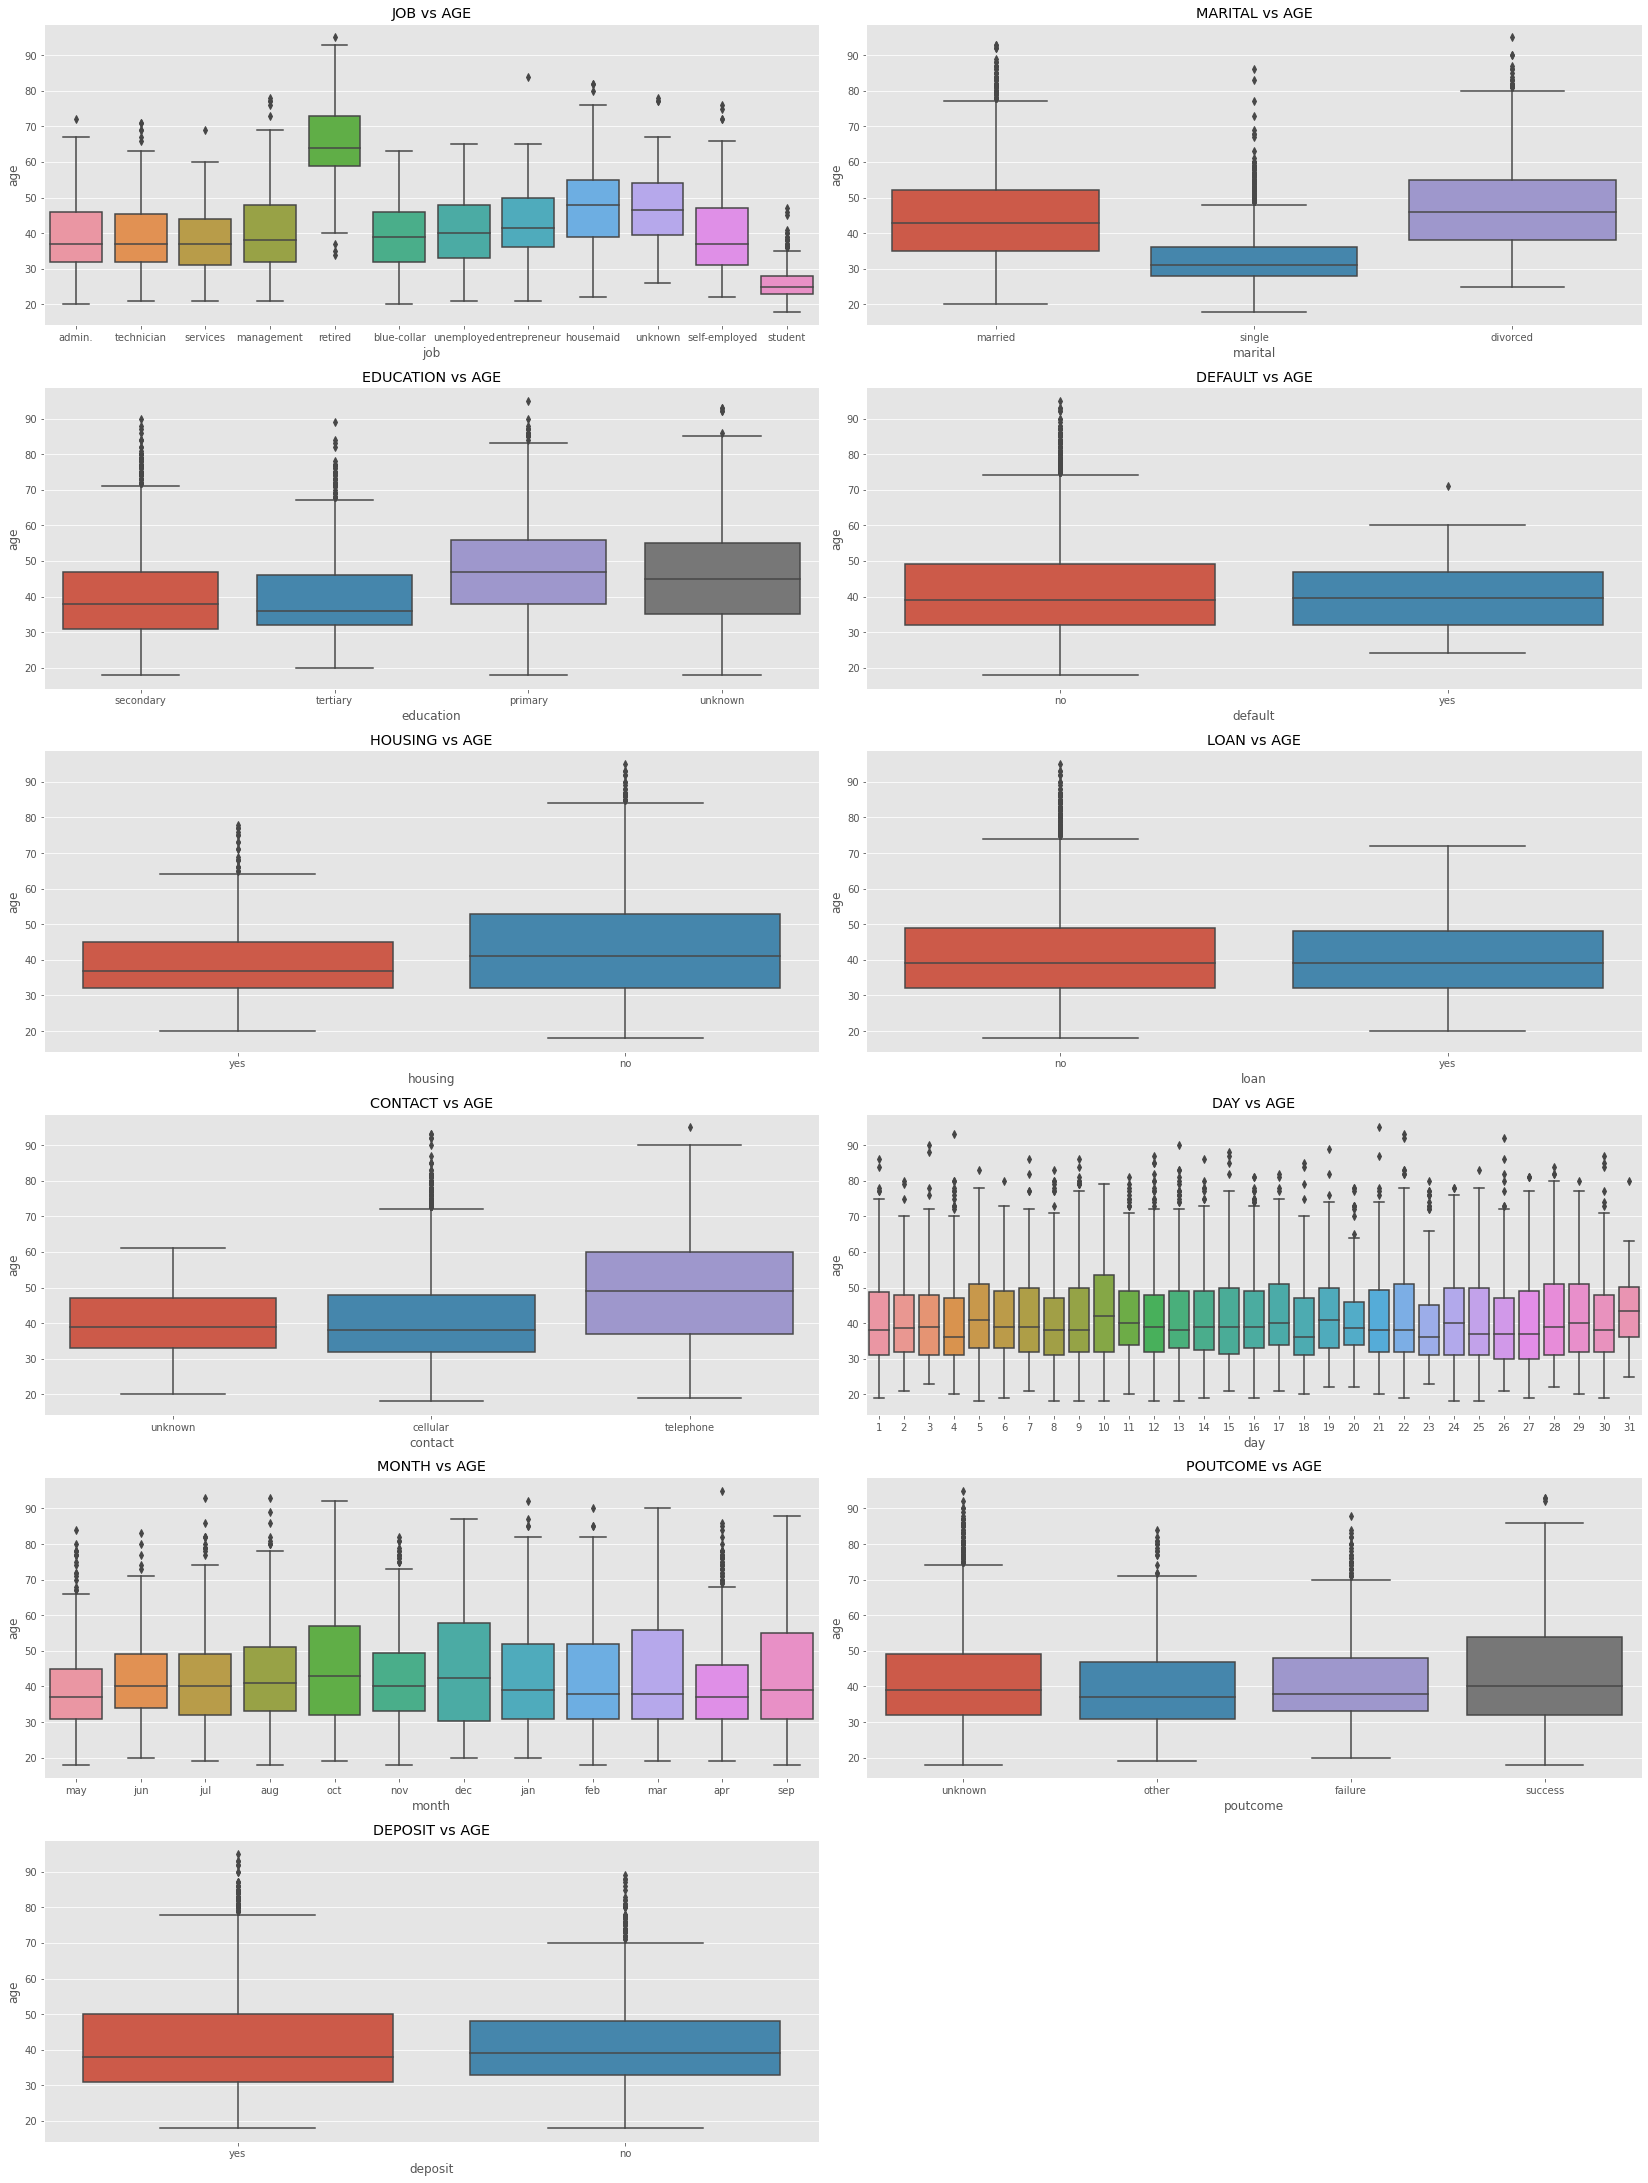

In [127]:
 # age vs categorical variables
 plt.figure(figsize=(23,35))
 for i in range(len(age_to_cat.columns)-1):
   plt.subplot(7,2,i+1)
   sns.boxplot(data=age_to_cat, x=age_to_cat.columns[i], y = 'age')
  # plt.axhline(age_to_cat[age_to_cat.columns[i]]['age'].mean(), label ='Mean = {}'.format(round(age_to_cat[age_to_cat.columns[i]]['age'].mean(),3)))
   plt.title(age_to_cat.columns[i].upper()+' vs AGE')
plt.tight_layout()

## Balance

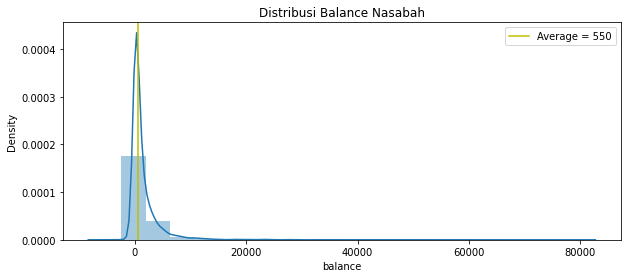

In [17]:
plt.figure(figsize=(10,4))
sns.distplot(df.balance,bins=20)
#plt.xticks(ticks=list(np.arange(0,100,5)))
#plt.axvline(df['age'].mean(), label='mean = {}'.format(round(df['age'].mean()),2),color='r')
plt.axvline(df['balance'].median(), label='Average = {}'.format(round(df['balance'].median()),2),color='y')
#plt.axvline(df['age'].mode()[0], label='mode = {}'.format(df['age'].mode()[0]),color='g')
plt.title('Distribusi Balance Nasabah')
plt.legend();

In [18]:
balance_deposit_yes = df['deposit'] == 'yes'
balance_deposit_yes = df.loc[balance_deposit_yes]
balance_deposit_yes.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [19]:
balance_deposit_no = df['deposit'] == 'no'
balance_deposit_no = df.loc[balance_deposit_no]
balance_deposit_no.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5289,57,retired,single,primary,no,604,no,no,cellular,19,nov,187,1,-1,0,unknown,no
5290,45,admin.,divorced,secondary,no,0,yes,no,cellular,17,nov,102,1,-1,0,unknown,no
5291,48,blue-collar,married,secondary,no,238,yes,yes,cellular,2,jun,118,2,81,1,success,no
5292,34,admin.,single,secondary,no,673,yes,no,cellular,29,jan,89,1,260,2,failure,no
5293,37,entrepreneur,married,tertiary,no,7944,no,no,cellular,21,nov,102,1,-1,0,unknown,no


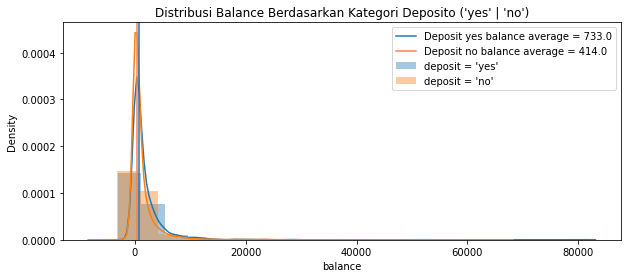

In [20]:
plt.figure(figsize=(10,4))
#plt.xticks(ticks=list(np.arange(0,100,5)))
sns.distplot(balance_deposit_yes.balance, bins=20,label="deposit = 'yes'")
sns.distplot(balance_deposit_no.balance, bins = 20,label="deposit = 'no'")
plt.axvline(balance_deposit_yes.balance.median(),label='Deposit yes balance average = {}'.format(round(balance_deposit_yes.balance.median(),3)))
plt.axvline(balance_deposit_no.balance.median(),label='Deposit no balance average = {}'.format(round(balance_deposit_no.balance.median(),3)),c='coral')
plt.title("Distribusi Balance Berdasarkan Kategori Deposito ('yes' | 'no')")
plt.legend();

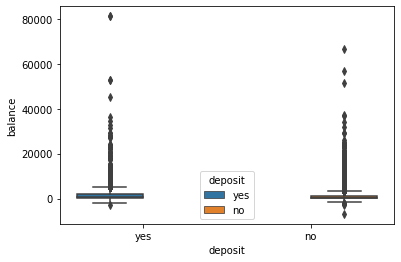

In [21]:
sns.boxplot(data=df, x = 'deposit', y = 'balance', hue='deposit');

### Balance vs Variabel-Variabel Kategorik

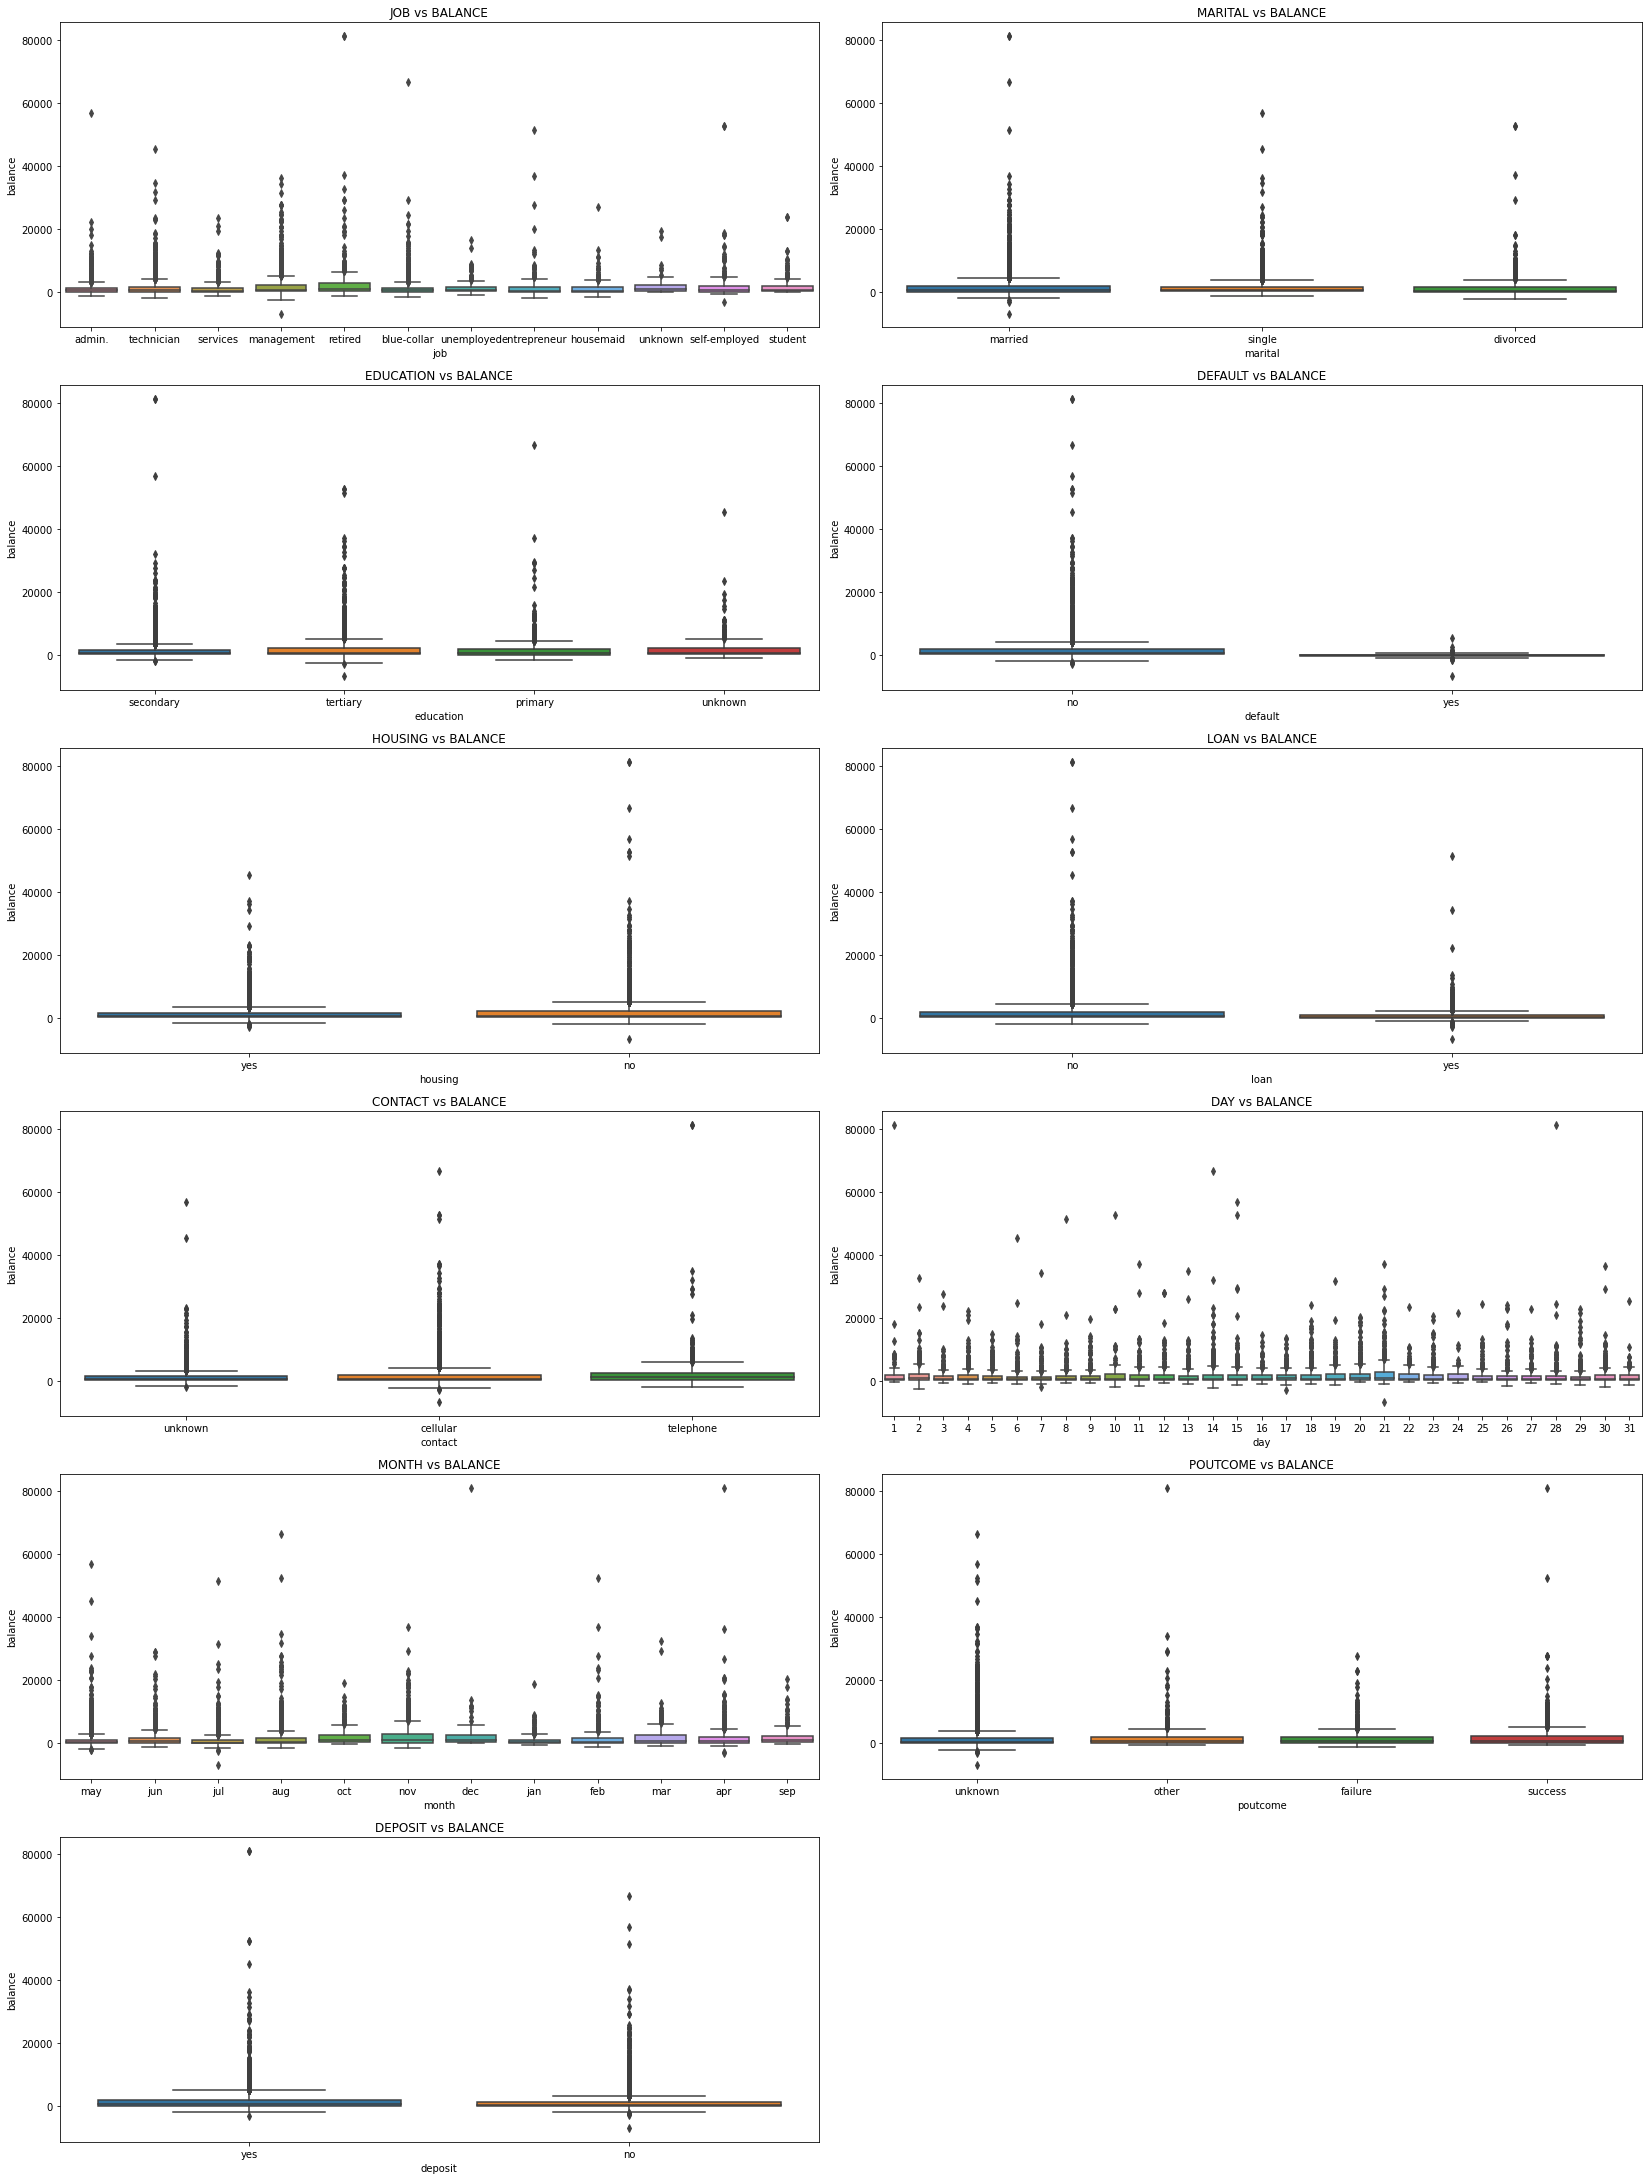

In [22]:
deleted_balance = {'age', 'balance', 'duration', 'campaign','pdays','previous'}
list3 = [ele for ele in df.columns if ele not in deleted_balance]

balance_to_cat = df[list3]
balance_to_cat['balance'] = df['balance']

 # balance vs categorical variables
plt.figure(figsize=(23,35))
for i in range(len(balance_to_cat.columns)-1):
  plt.subplot(7,2,i+1)
  sns.boxplot(data=balance_to_cat, x=balance_to_cat.columns[i], y = 'balance')
  # plt.axhline(age_to_cat[age_to_cat.columns[i]]['age'].mean(), label ='Mean = {}'.format(round(age_to_cat[age_to_cat.columns[i]]['age'].mean(),3)))
  plt.title(balance_to_cat.columns[i].upper()+' vs BALANCE')
plt.tight_layout()

## Duration

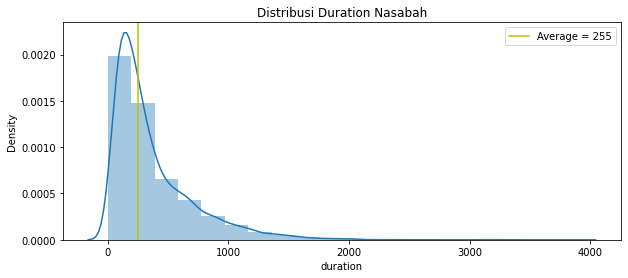

In [23]:
plt.figure(figsize=(10,4))
sns.distplot(df.duration,bins=20)
#plt.xticks(ticks=list(np.arange(0,100,5)))
#plt.axvline(df['age'].mean(), label='mean = {}'.format(round(df['age'].mean()),2),color='r')
plt.axvline(df['duration'].median(), label='Average = {}'.format(round(df['duration'].median()),2),color='y')
#plt.axvline(df['age'].mode()[0], label='mode = {}'.format(df['age'].mode()[0]),color='g')
plt.title('Distribusi Duration Nasabah')
plt.legend();

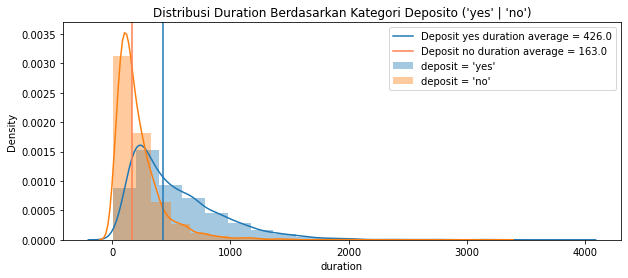

In [24]:
duration_deposit_yes = df['deposit'] == 'yes'
duration_deposit_yes = df.loc[duration_deposit_yes]
duration_deposit_no = df['deposit'] == 'no'
duration_deposit_no = df.loc[duration_deposit_no]

plt.figure(figsize=(10,4))
#plt.xticks(ticks=list(np.arange(0,100,5)))
sns.distplot(duration_deposit_yes.duration, bins=20,label="deposit = 'yes'")
sns.distplot(duration_deposit_no.duration, bins = 20,label="deposit = 'no'")
plt.axvline(duration_deposit_yes.duration.median(),label='Deposit yes duration average = {}'.format(round(duration_deposit_yes.duration.median(),3)))
plt.axvline(duration_deposit_no.duration.median(),label='Deposit no duration average = {}'.format(round(duration_deposit_no.duration.median(),3)),c='coral')
plt.title("Distribusi Duration Berdasarkan Kategori Deposito ('yes' | 'no')")
plt.legend();



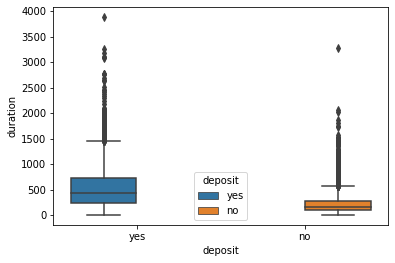

In [25]:
sns.boxplot(data=df, x = 'deposit', y = 'duration', hue='deposit');

### Duration vs Variabel-Variabel Kategorik

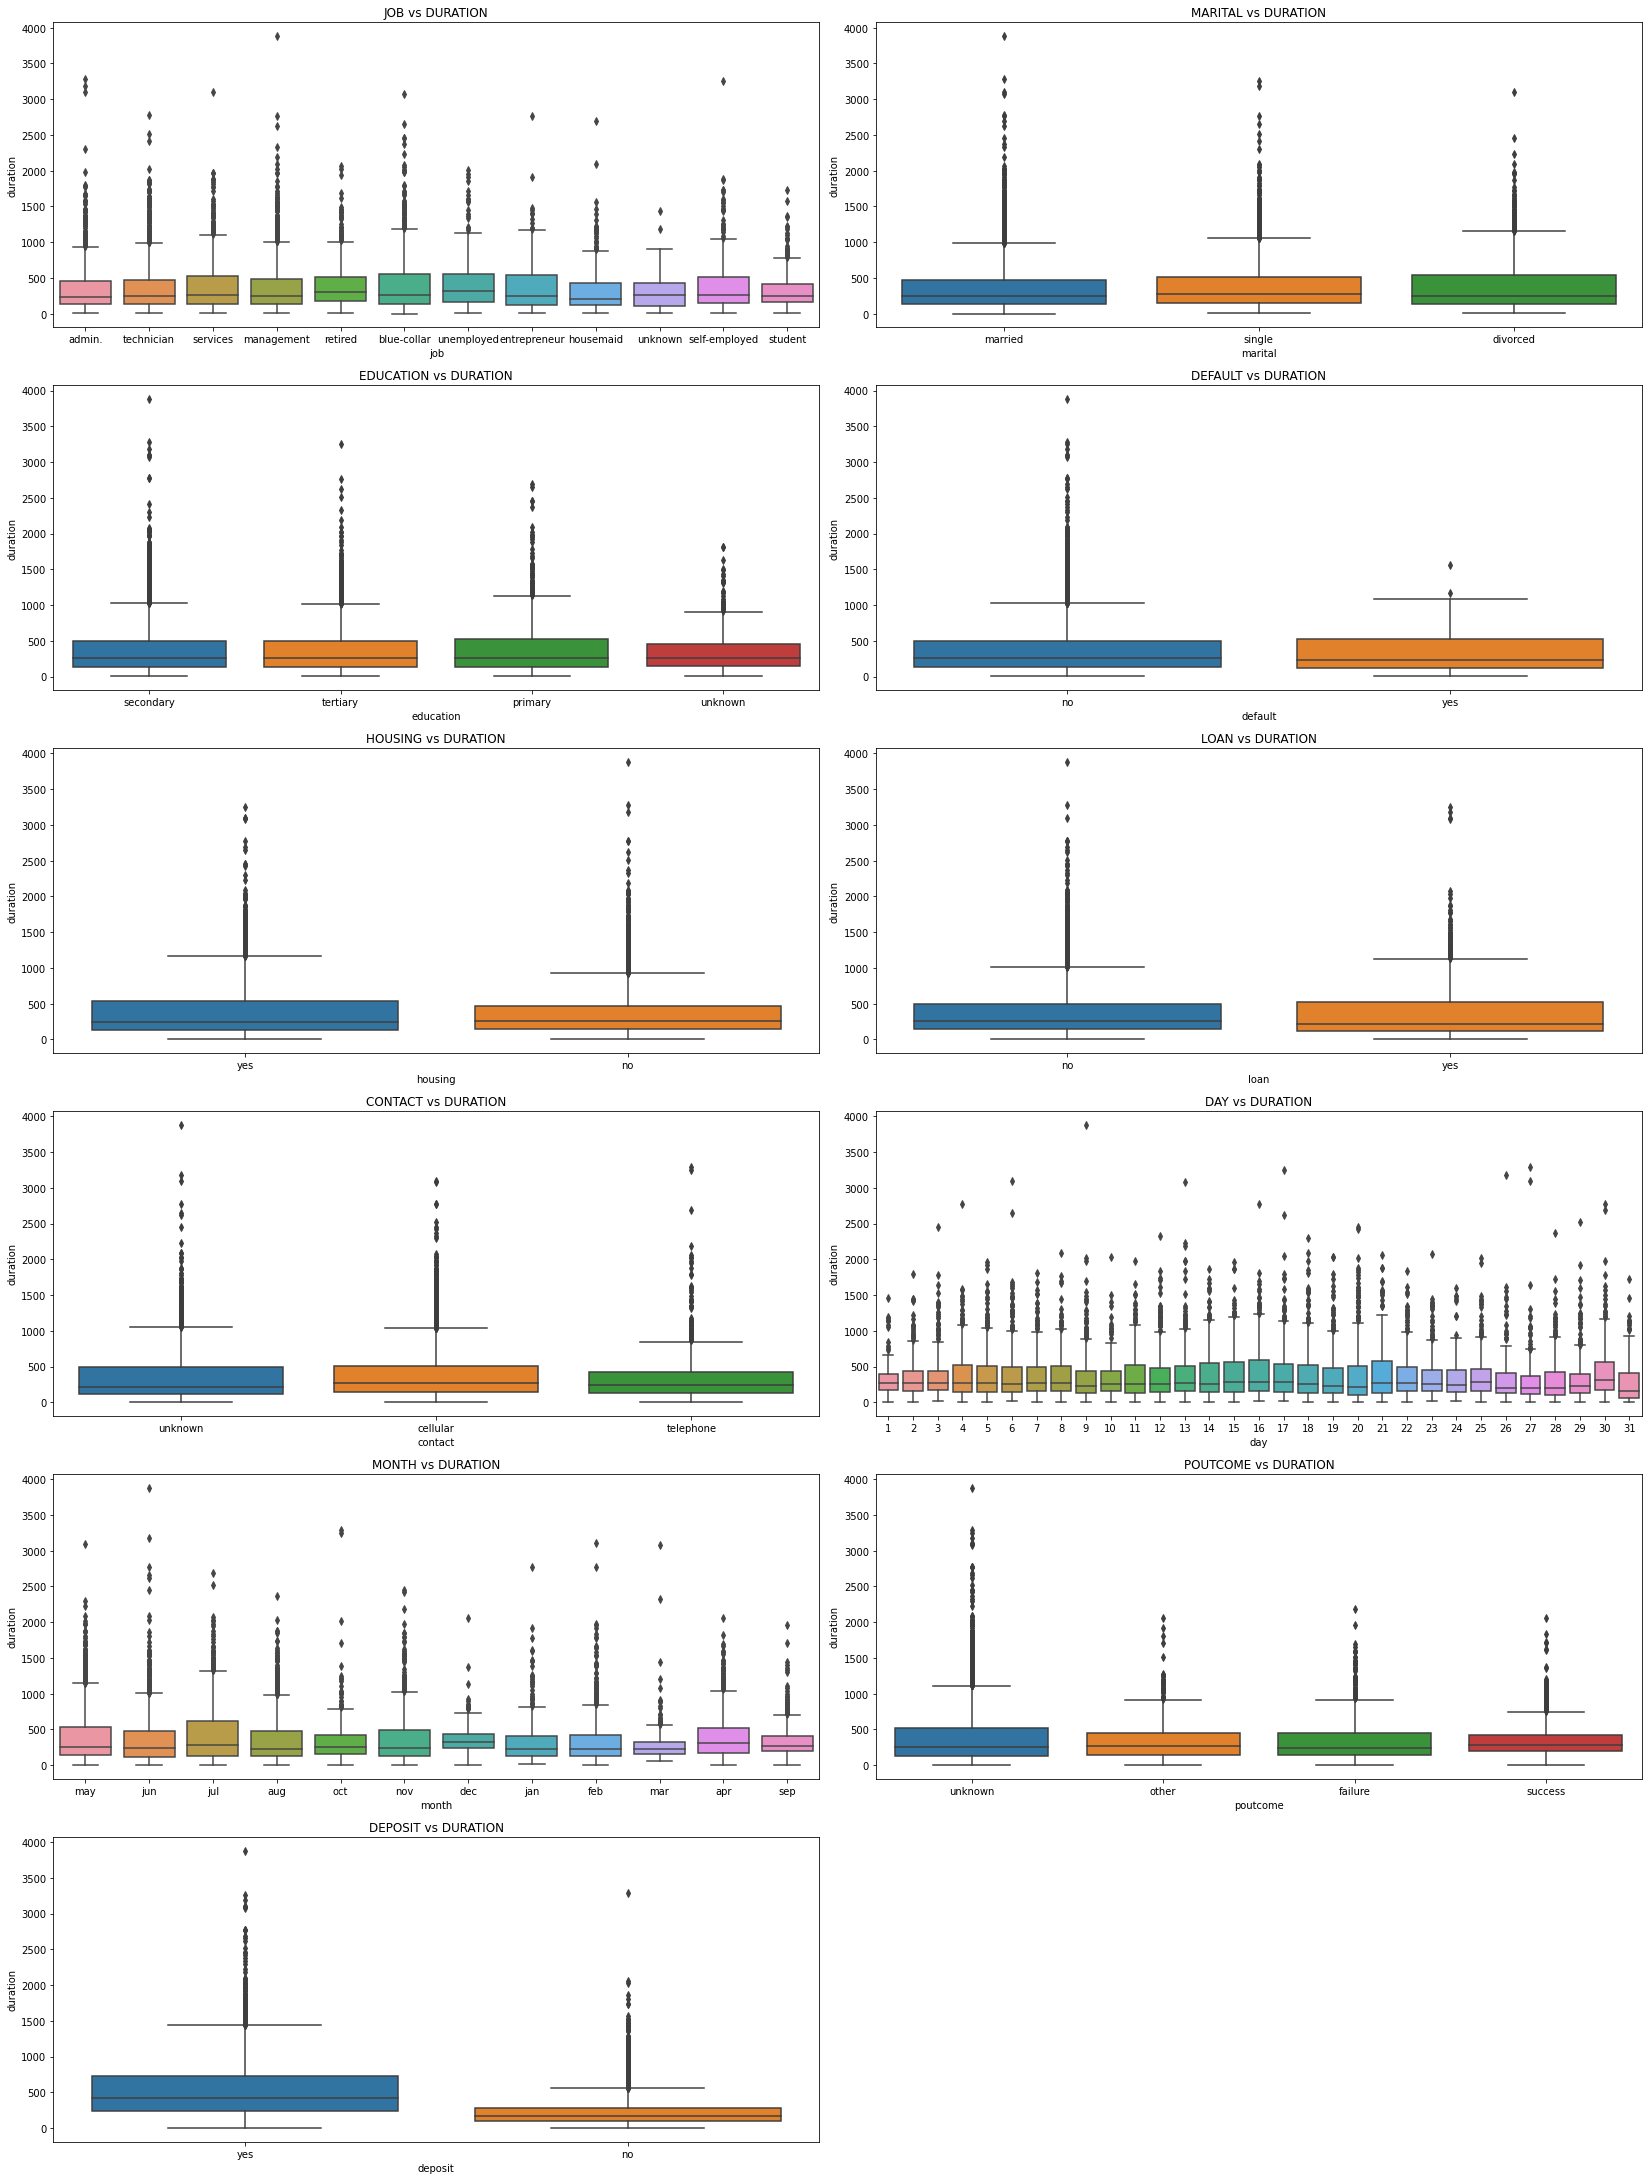

In [26]:
deleted_duration = {'age', 'balance', 'duration', 'campaign','pdays','previous'}
list4 = [ele for ele in df.columns if ele not in deleted_duration]

duration_to_cat = df[list4]
duration_to_cat['duration'] = df['duration']

 # duration vs categorical variables
plt.figure(figsize=(23,35))
for i in range(len(duration_to_cat.columns)-1):
  plt.subplot(7,2,i+1)
  sns.boxplot(data=duration_to_cat, x=duration_to_cat.columns[i], y = 'duration')
  # plt.axhline(age_to_cat[age_to_cat.columns[i]]['age'].mean(), label ='Mean = {}'.format(round(age_to_cat[age_to_cat.columns[i]]['age'].mean(),3)))
  plt.title(duration_to_cat.columns[i].upper()+' vs DURATION')
plt.tight_layout()

## Pdays

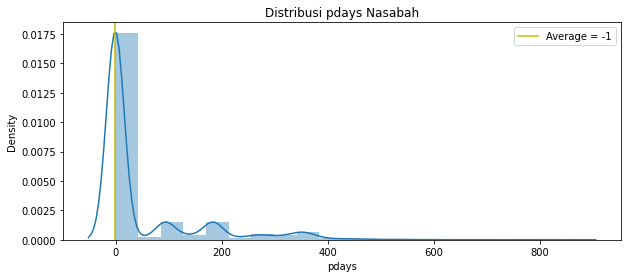

In [27]:
plt.figure(figsize=(10,4))
sns.distplot(df.pdays,bins=20)
#plt.xticks(ticks=list(np.arange(0,100,5)))
#plt.axvline(df['age'].mean(), label='mean = {}'.format(round(df['age'].mean()),2),color='r')
plt.axvline(df['pdays'].median(), label='Average = {}'.format(round(df['pdays'].median()),2),color='y')
#plt.axvline(df['age'].mode()[0], label='mode = {}'.format(df['age'].mode()[0]),color='g')
plt.title('Distribusi pdays Nasabah')
plt.legend();

In [28]:
df.pdays.max()

854

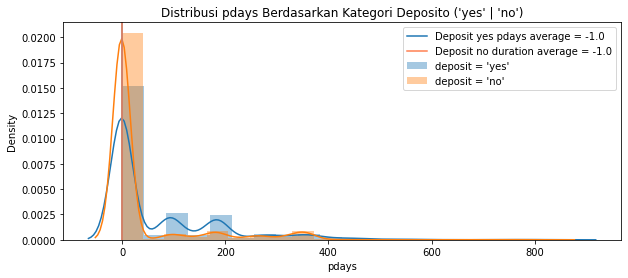

In [29]:
pdays_deposit_yes = df['deposit'] == 'yes'
pdays_deposit_yes = df.loc[pdays_deposit_yes]
pdays_deposit_no = df['deposit'] == 'no'
pdays_deposit_no = df.loc[pdays_deposit_no]

plt.figure(figsize=(10,4))
#plt.xticks(ticks=list(np.arange(0,100,5)))
sns.distplot(pdays_deposit_yes.pdays, bins=20,label="deposit = 'yes'")
sns.distplot(pdays_deposit_no.pdays, bins = 20,label="deposit = 'no'")
plt.axvline(pdays_deposit_yes.pdays.median(),label='Deposit yes pdays average = {}'.format(round(pdays_deposit_yes.pdays.median(),3)))
plt.axvline(pdays_deposit_no.pdays.median(),label='Deposit no duration average = {}'.format(round(pdays_deposit_no.pdays.median(),3)),c='coral')
plt.title("Distribusi pdays Berdasarkan Kategori Deposito ('yes' | 'no')")
plt.legend();



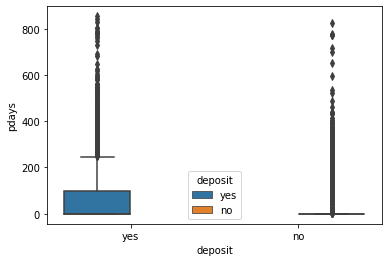

In [30]:
sns.boxplot(data=df, x = 'deposit', y = 'pdays', hue='deposit');

### Pdays vs Variabel-Variabel Kategorik

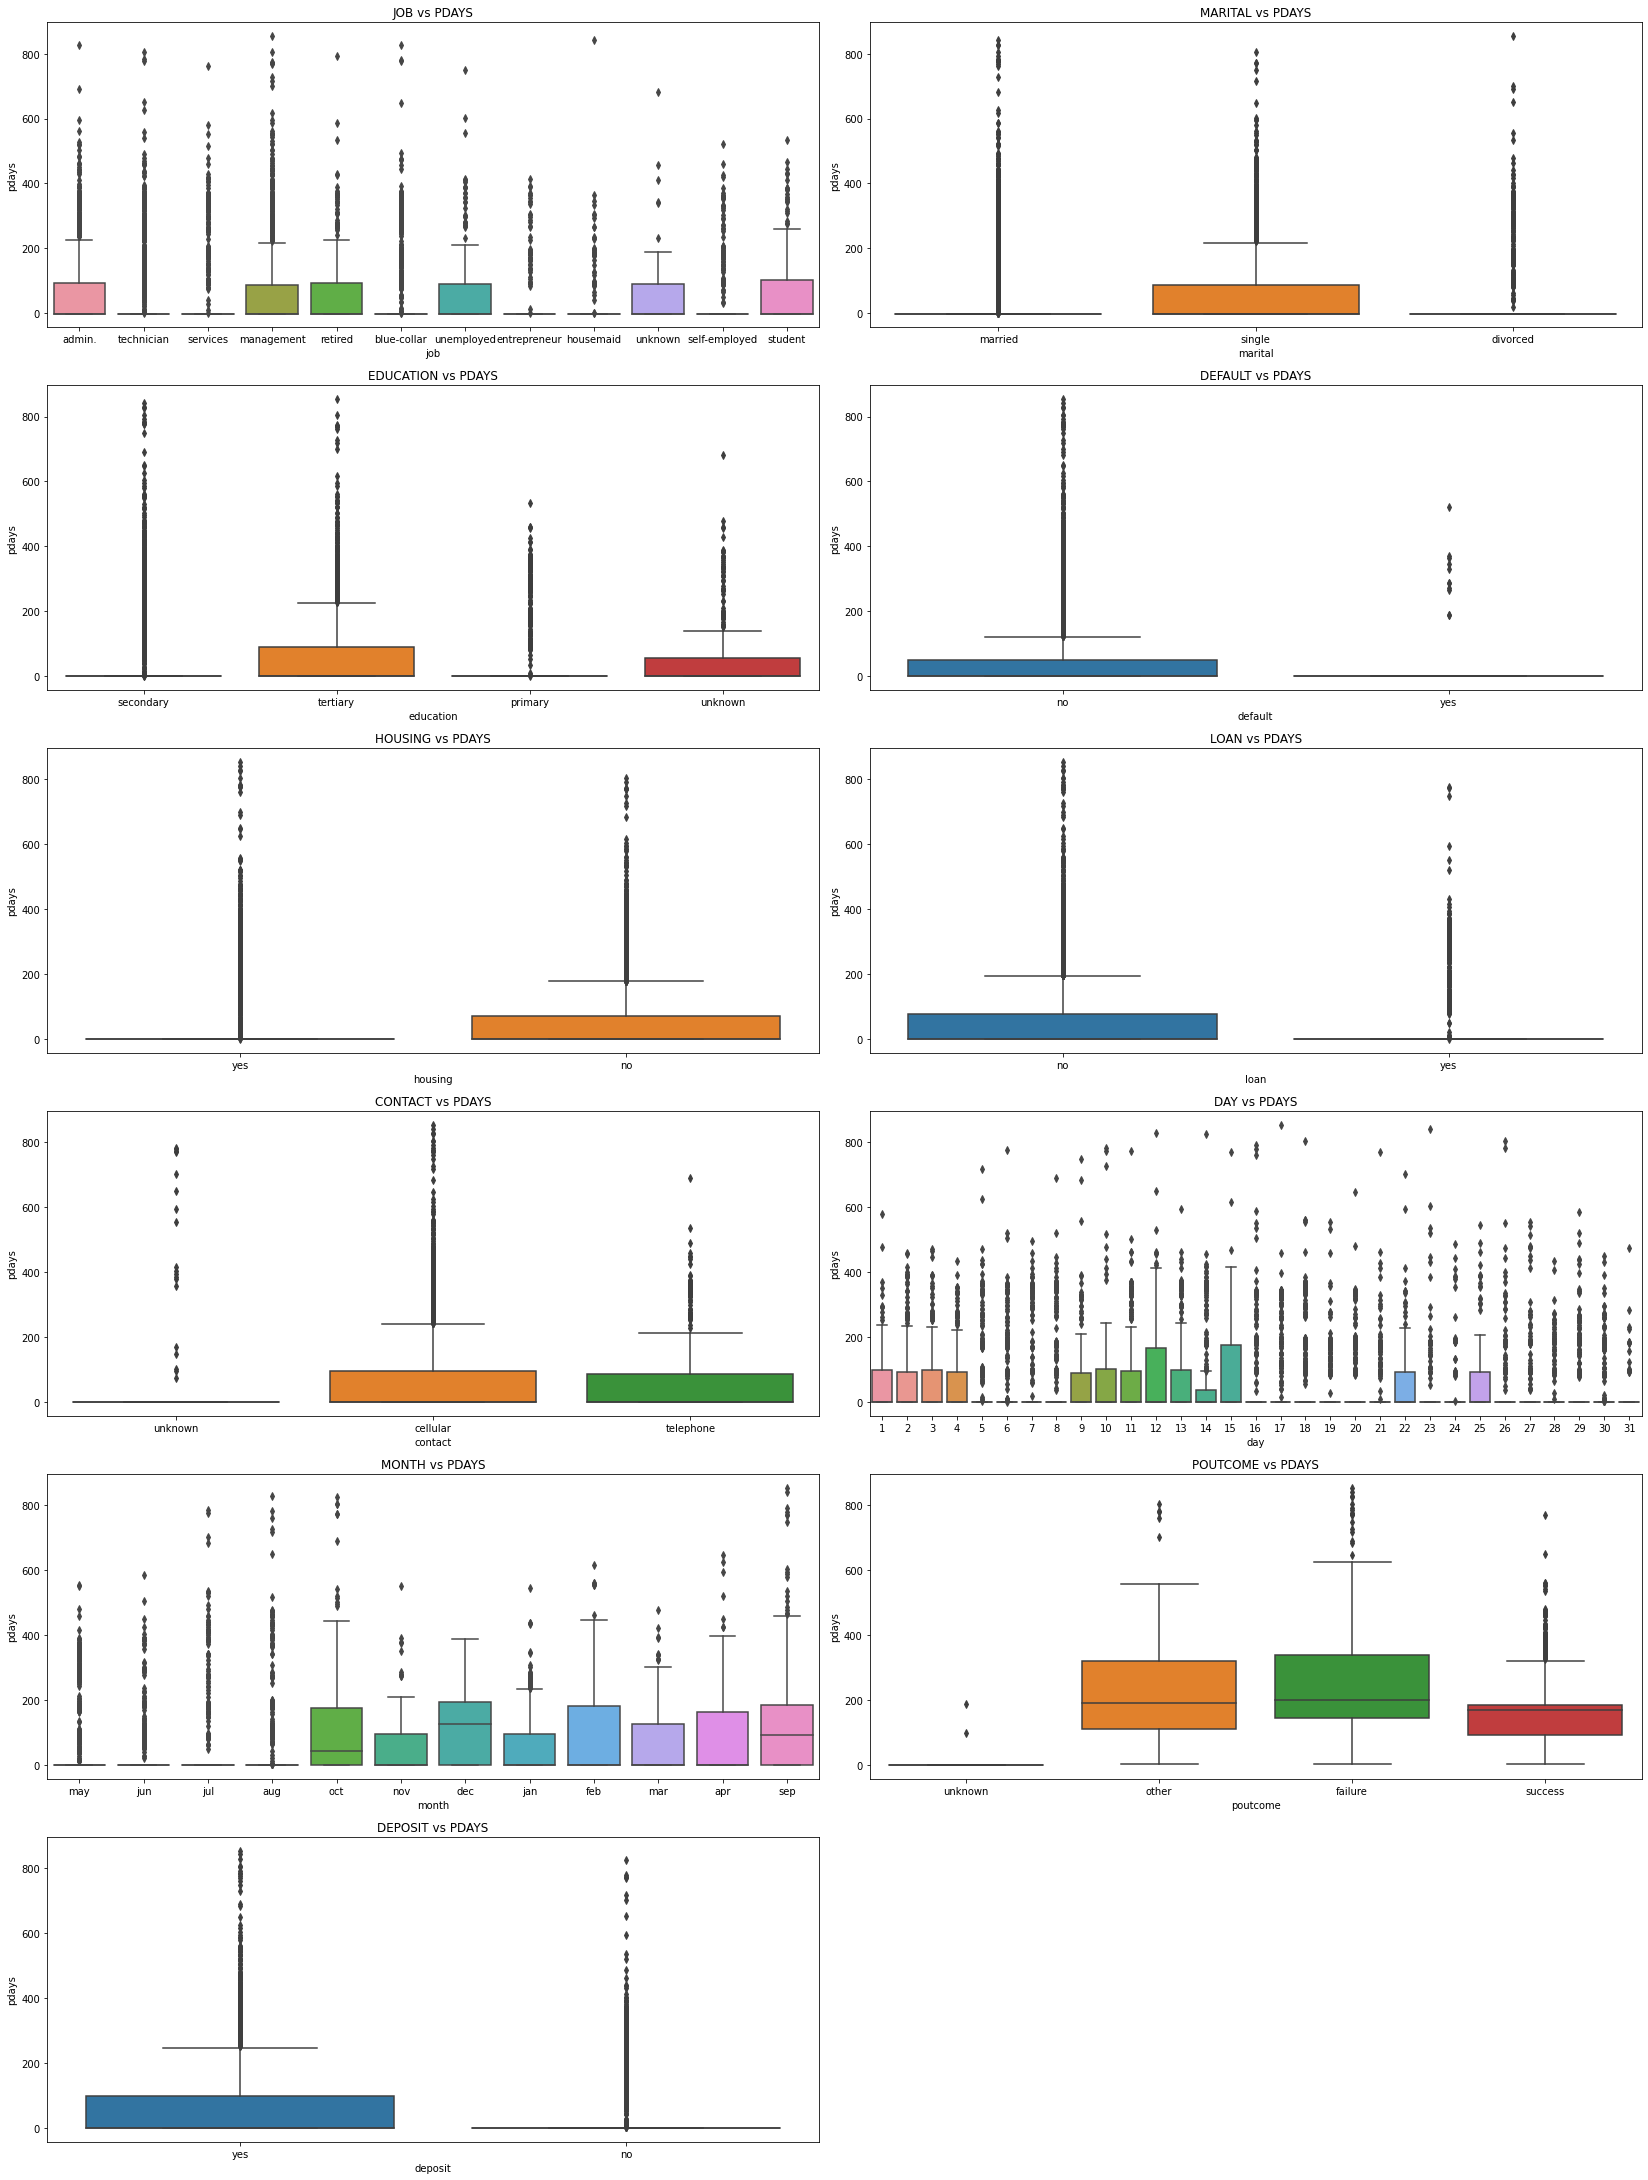

In [31]:
deleted_pdays = {'age', 'balance', 'duration', 'campaign','pdays','previous'}
list5 = [ele for ele in df.columns if ele not in deleted_pdays]

pdays_to_cat = df[list5]
pdays_to_cat['pdays'] = df['pdays']

 # pdays vs categorical variables
plt.figure(figsize=(23,35))
for i in range(len(pdays_to_cat.columns)-1):
  plt.subplot(7,2,i+1)
  sns.boxplot(data=pdays_to_cat, x=pdays_to_cat.columns[i], y = 'pdays')
  # plt.axhline(age_to_cat[age_to_cat.columns[i]]['age'].mean(), label ='Mean = {}'.format(round(age_to_cat[age_to_cat.columns[i]]['age'].mean(),3)))
  plt.title(pdays_to_cat.columns[i].upper()+' vs PDAYS')
plt.tight_layout()

## Previous

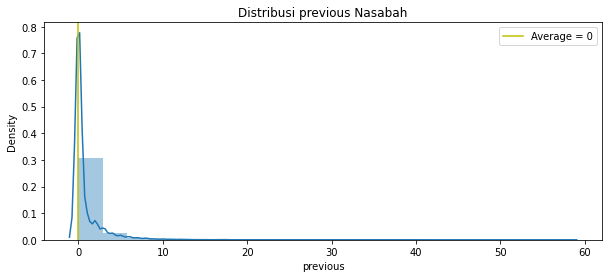

In [32]:
plt.figure(figsize=(10,4))
sns.distplot(df.previous,bins=20)
#plt.xticks(ticks=list(np.arange(0,100,5)))
#plt.axvline(df['age'].mean(), label='mean = {}'.format(round(df['age'].mean()),2),color='r')
plt.axvline(df['previous'].median(), label='Average = {}'.format(round(df['previous'].median()),2),color='y')
#plt.axvline(df['age'].mode()[0], label='mode = {}'.format(df['age'].mode()[0]),color='g')
plt.title('Distribusi previous Nasabah')
plt.legend();

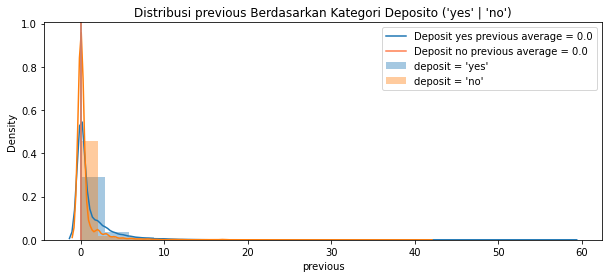

In [33]:
previous_deposit_yes = df['deposit'] == 'yes'
previous_deposit_yes = df.loc[previous_deposit_yes]
previous_deposit_no = df['deposit'] == 'no'
previous_deposit_no = df.loc[previous_deposit_no]

plt.figure(figsize=(10,4))
#plt.xticks(ticks=list(np.arange(0,100,5)))
sns.distplot(previous_deposit_yes.previous, bins=20,label="deposit = 'yes'")
sns.distplot(previous_deposit_no.previous, bins = 20,label="deposit = 'no'")
plt.axvline(previous_deposit_yes.previous.median(),label='Deposit yes previous average = {}'.format(round(previous_deposit_yes.previous.median(),3)))
plt.axvline(previous_deposit_no.previous.median(),label='Deposit no previous average = {}'.format(round(previous_deposit_no.previous.median(),3)),c='coral')
plt.title("Distribusi previous Berdasarkan Kategori Deposito ('yes' | 'no')")
plt.legend();



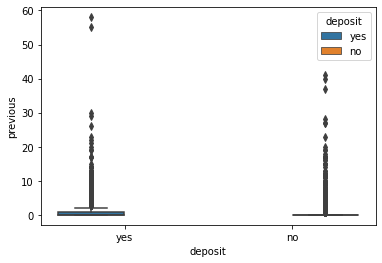

In [34]:
sns.boxplot(data=df, x = 'deposit', y = 'previous', hue='deposit');

### Previous vs Variabel-Variabel Kategorik

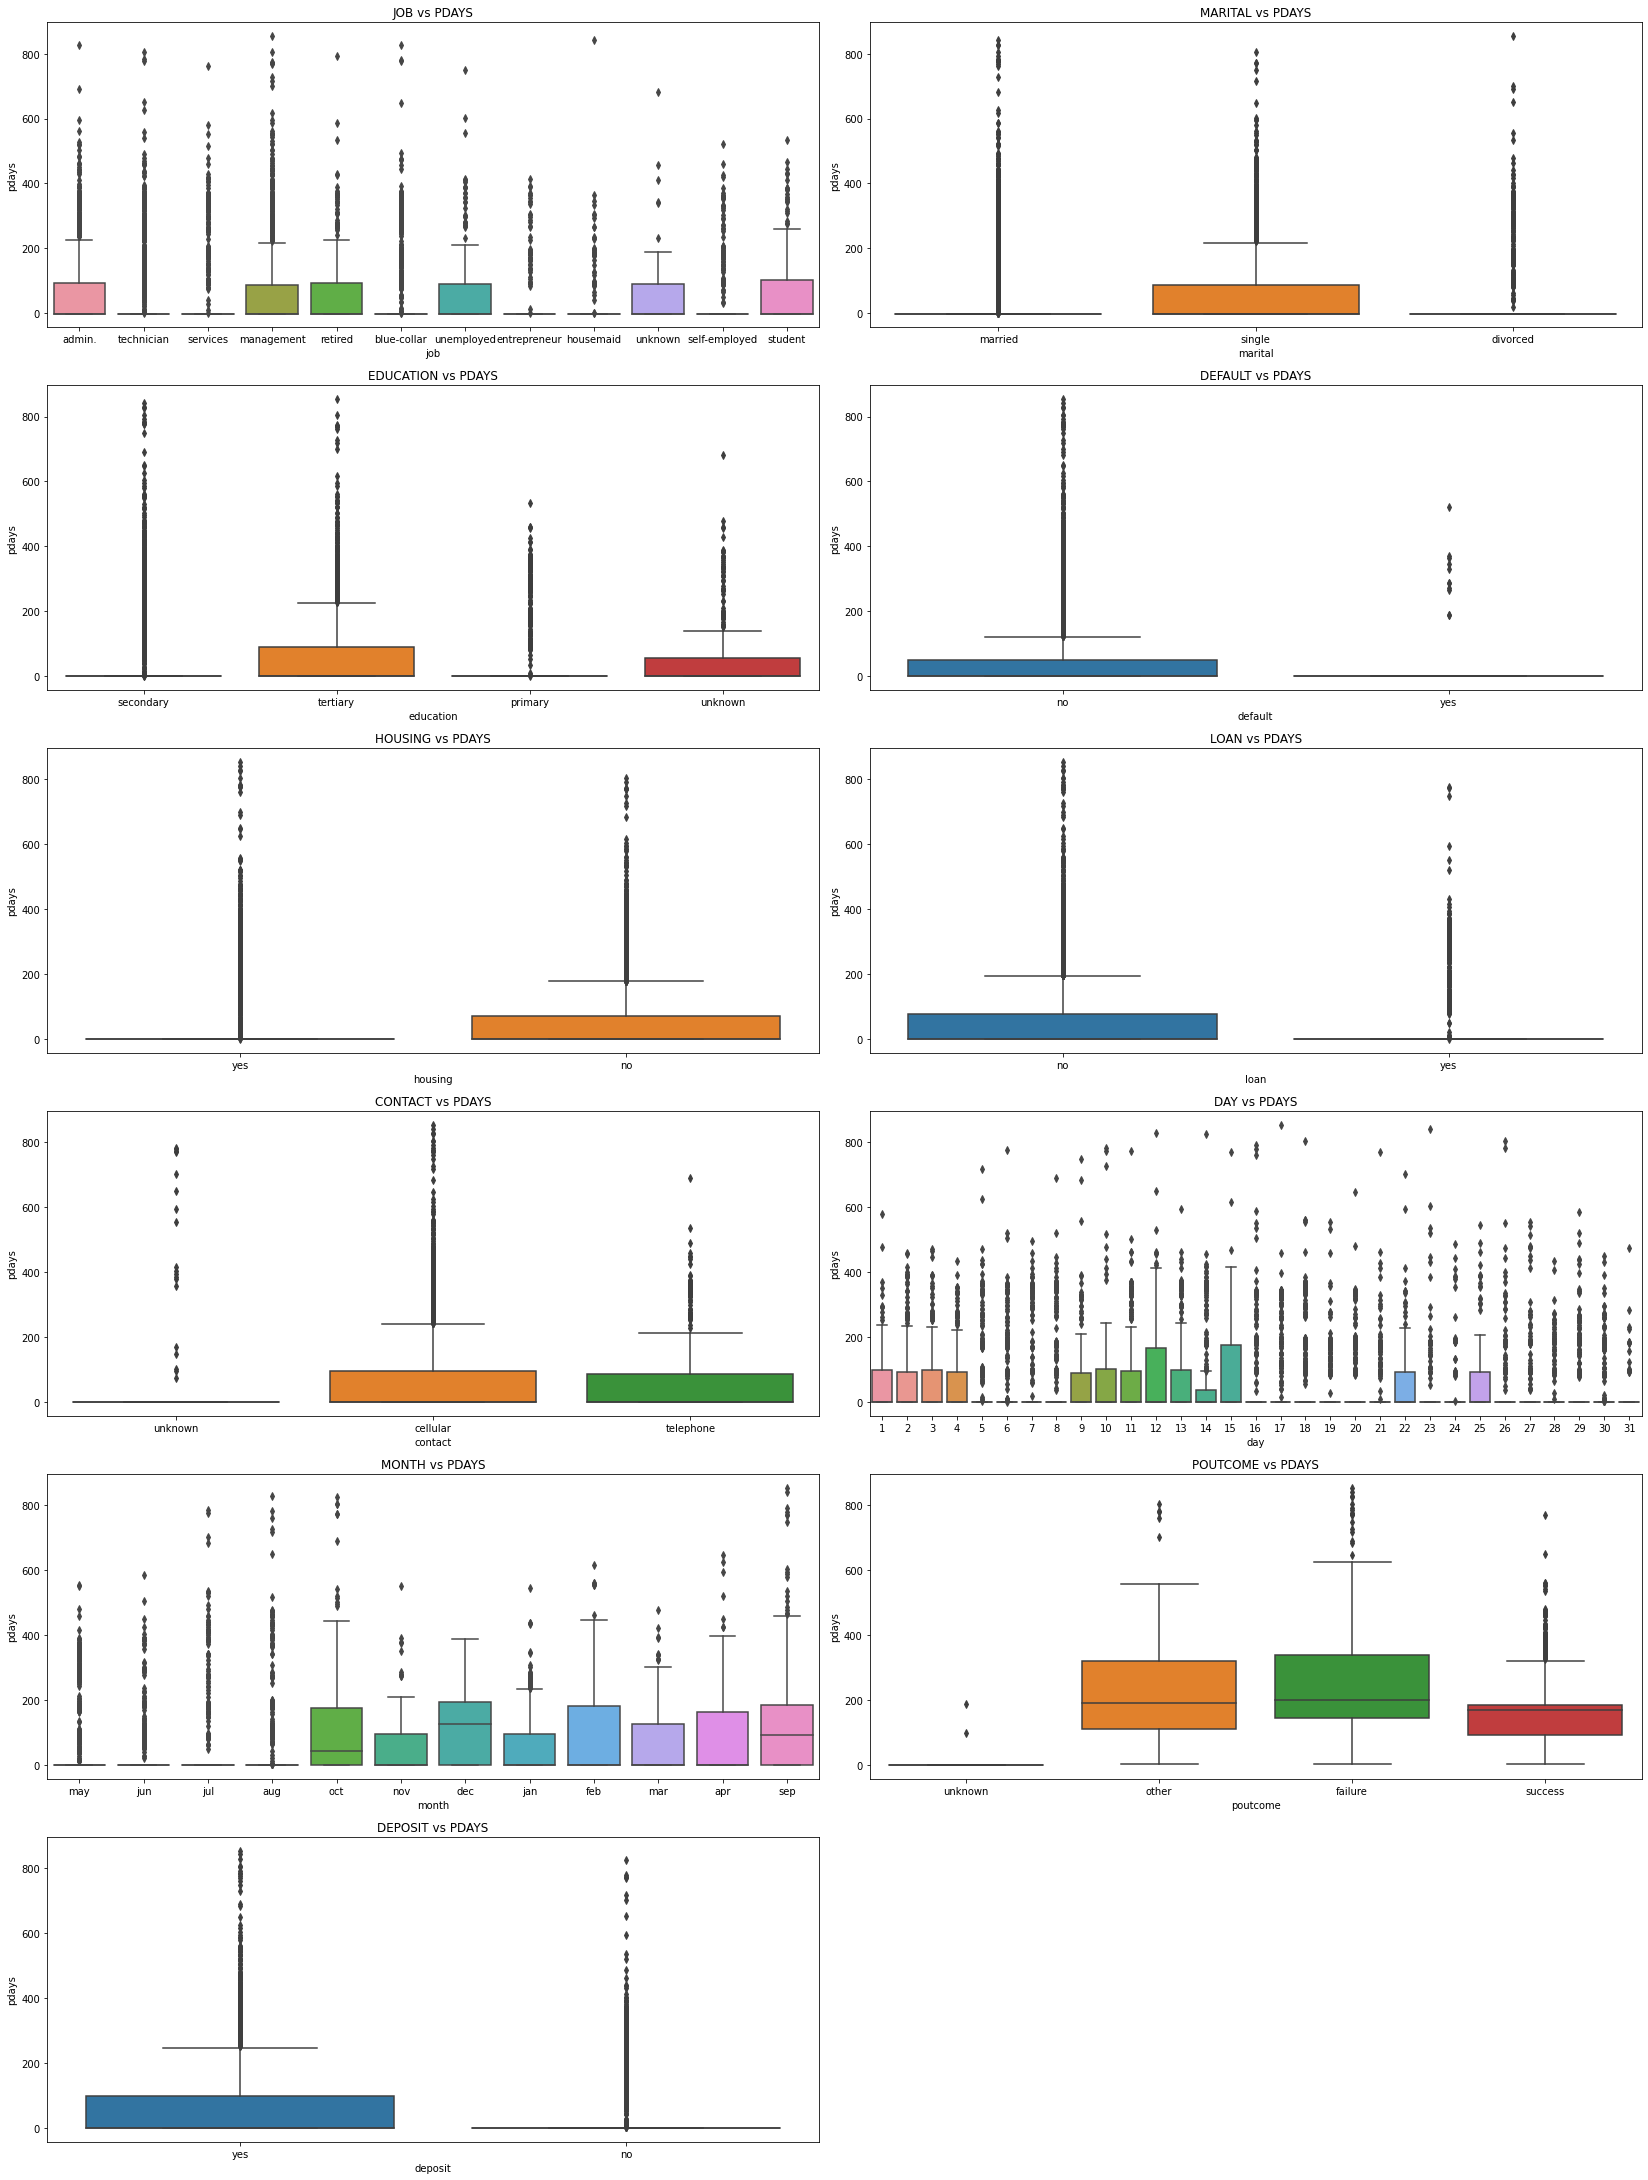

In [35]:
deleted_previous = {'age', 'balance', 'duration', 'campaign','pdays','previous'}
list6 = [ele for ele in df.columns if ele not in deleted_pdays]

pdays_to_cat = df[list5]
pdays_to_cat['pdays'] = df['pdays']

 # Previous vs categorical variables
plt.figure(figsize=(23,35))
for i in range(len(pdays_to_cat.columns)-1):
  plt.subplot(7,2,i+1)
  sns.boxplot(data=pdays_to_cat, x=pdays_to_cat.columns[i], y = 'pdays')
  # plt.axhline(age_to_cat[age_to_cat.columns[i]]['age'].mean(), label ='Mean = {}'.format(round(age_to_cat[age_to_cat.columns[i]]['age'].mean(),3)))
  plt.title(pdays_to_cat.columns[i].upper()+' vs PDAYS')
plt.tight_layout()

## Campaign

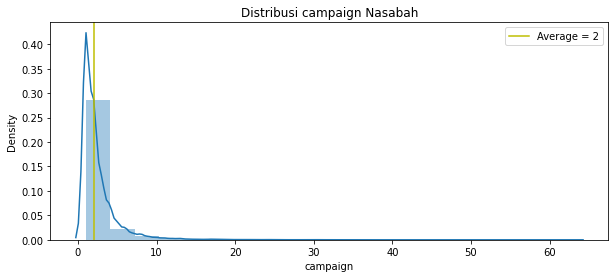

In [36]:
plt.figure(figsize=(10,4))
sns.distplot(df.campaign,bins=20)
#plt.xticks(ticks=list(np.arange(0,100,5)))
#plt.axvline(df['age'].mean(), label='mean = {}'.format(round(df['age'].mean()),2),color='r')
plt.axvline(df['campaign'].median(), label='Average = {}'.format(round(df['campaign'].median()),2),color='y')
#plt.axvline(df['age'].mode()[0], label='mode = {}'.format(df['age'].mode()[0]),color='g')
plt.title('Distribusi campaign Nasabah')
plt.legend();

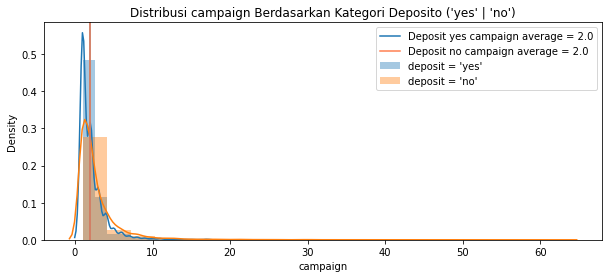

In [37]:
campaign_deposit_yes = df['deposit'] == 'yes'
campaign_deposit_yes = df.loc[campaign_deposit_yes]
campaign_deposit_no = df['deposit'] == 'no'
campaign_deposit_no = df.loc[campaign_deposit_no]

plt.figure(figsize=(10,4))
#plt.xticks(ticks=list(np.arange(0,100,5)))
sns.distplot(campaign_deposit_yes.campaign, bins=20,label="deposit = 'yes'")
sns.distplot(campaign_deposit_no.campaign, bins = 20,label="deposit = 'no'")
plt.axvline(campaign_deposit_yes.campaign.median(),label='Deposit yes campaign average = {}'.format(round(campaign_deposit_yes.campaign.median(),3)))
plt.axvline(campaign_deposit_no.campaign.median(),label='Deposit no campaign average = {}'.format(round(campaign_deposit_no.campaign.median(),3)),c='coral')
plt.title("Distribusi campaign Berdasarkan Kategori Deposito ('yes' | 'no')")
plt.legend();



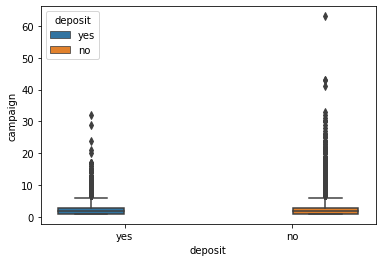

In [38]:
sns.boxplot(data=df, x = 'deposit', y = 'campaign', hue='deposit');

### Campaign Variabel-Variabel Kategorik

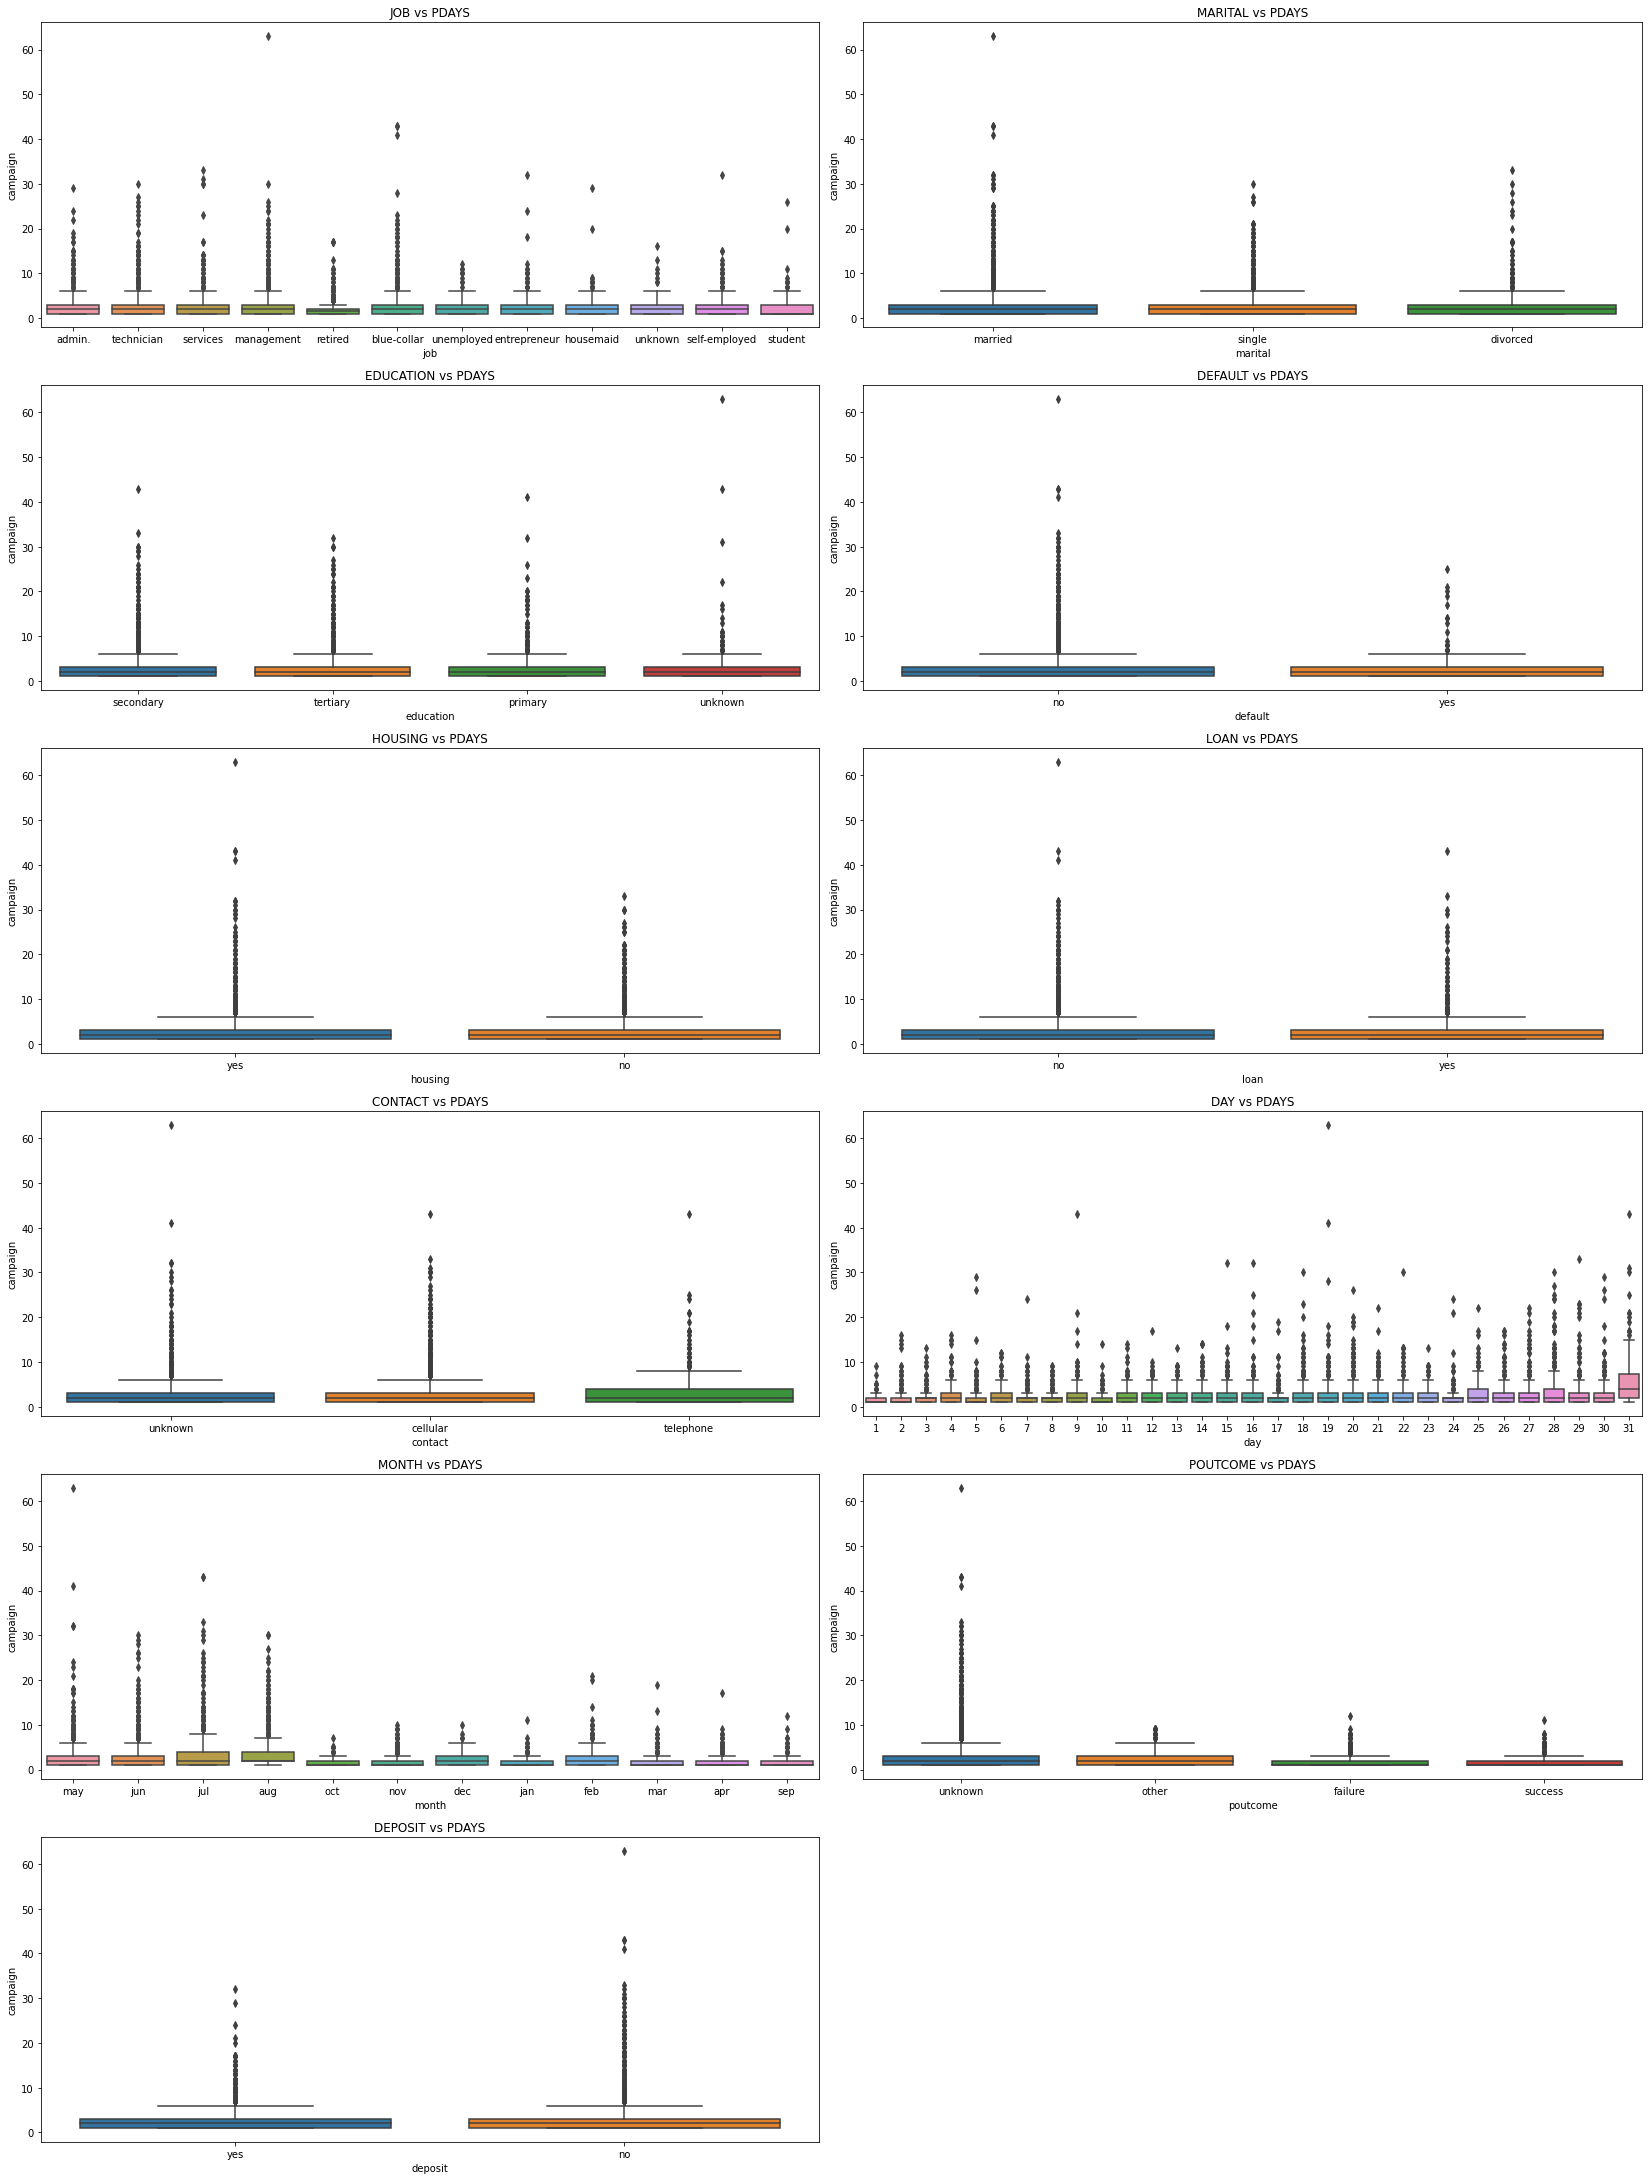

In [39]:
deleted_campaign = {'age', 'balance', 'duration', 'campaign','pdays','previous'}
list7 = [ele for ele in df.columns if ele not in deleted_campaign]

campaign_to_cat = df[list7]
campaign_to_cat['campaign'] = df['campaign']

 # age vs categorical variables
plt.figure(figsize=(23,35))
for i in range(len(campaign_to_cat.columns)-1):
  plt.subplot(7,2,i+1)
  sns.boxplot(data=campaign_to_cat, x=campaign_to_cat.columns[i], y = 'campaign')
  # plt.axhline(age_to_cat[age_to_cat.columns[i]]['age'].mean(), label ='Mean = {}'.format(round(age_to_cat[age_to_cat.columns[i]]['age'].mean(),3)))
  plt.title(campaign_to_cat.columns[i].upper()+' vs PDAYS')
plt.tight_layout()

# Features Engineering
Akan dilakukan pemilihan fitur-fitur yang akan dijadikan sebagai parameter dalam membangun model. Dilakukan dengan mendeteksi adayana outlier antar variabel numerik. Setelah itu, outlier tersebut akan disisihkan. 

In [40]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [41]:
deleted_out = {'day'}
list8 = [ele for ele in df.columns if ele not in deleted_out]

In [42]:
df_out = df[list8]
#df_out['campaign'] = df['campaign']
df_out.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

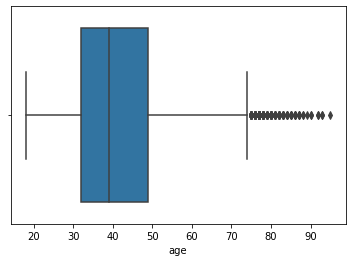

In [43]:
sns.boxplot(df['age']);

In [44]:
df_new = df.copy()

### Age

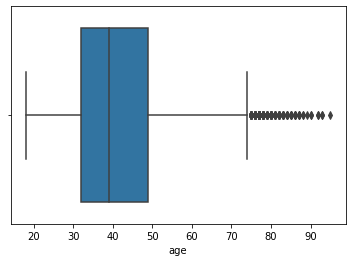

In [45]:
sns.boxplot(df_new['age']);

In [46]:
df_new["age"] = np.where(df_new["age"] <df_new['age'].quantile(0.10), df_new['age'].quantile(0.10),df_new['age'])
df_new["age"] = np.where(df_new["age"] >df_new['age'].quantile(0.90), df_new['age'].quantile(0.90),df_new['age'])
print(df_new['age'].skew())

0.4123928651128603


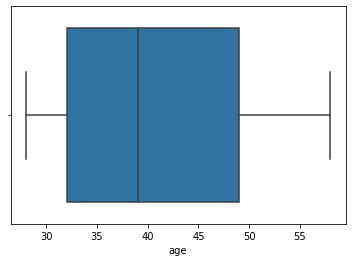

In [47]:
sns.boxplot(df_new['age']);

### Balance

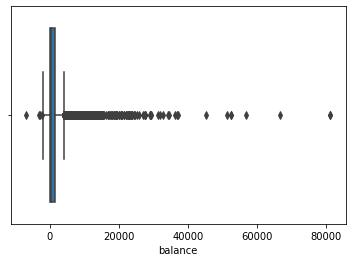

In [48]:
sns.boxplot(df_new['balance']);

In [49]:
df_new["balance"] = np.where(df_new["balance"] <df_new['balance'].quantile(0.10), df_new['balance'].quantile(0.10),df_new['balance'])
df_new["balance"] = np.where(df_new["balance"] >df_new['balance'].quantile(0.90), df_new['balance'].quantile(0.90),df_new['balance'])
print(df_new['balance'].skew())

1.142247974036395


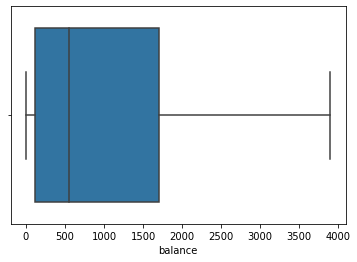

In [50]:
sns.boxplot(df_new['balance']);

### Duration

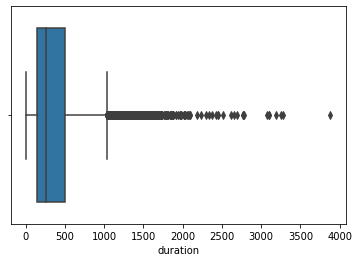

In [51]:
sns.boxplot(df_new['duration']);

In [52]:
df_new["duration"] = np.where(df_new["duration"] <df_new['duration'].quantile(0.10), df_new['duration'].quantile(0.10),df_new['duration'])
df_new["duration"] = np.where(df_new["duration"] >df_new['duration'].quantile(0.90), df_new['duration'].quantile(0.90),df_new['duration'])
print(df_new['duration'].skew())

0.8506119184251896


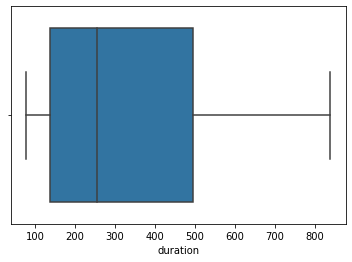

In [53]:
sns.boxplot(df_new['duration']);

### Pdays

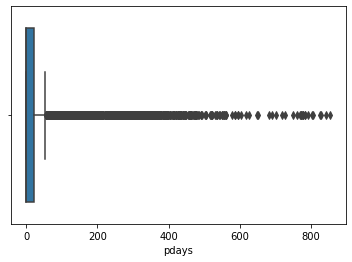

In [54]:
sns.boxplot(df_new['pdays']);

In [55]:
df_new["pdays"] = np.where(df_new["pdays"] <df_new['pdays'].quantile(0.10), df_new['pdays'].quantile(0.10),df_new['pdays'])
df_new["pdays"] = np.where(df_new["pdays"] >df_new['pdays'].quantile(0.90), df_new['pdays'].quantile(0.90),df_new['pdays'])
print(df_new['pdays'].skew())

1.4344713357254215


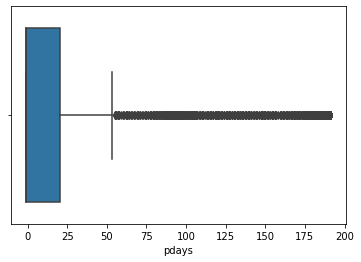

In [56]:
sns.boxplot(df_new['pdays']);

### Previous

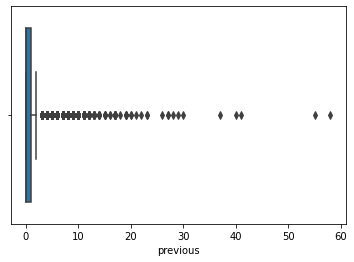

In [57]:
sns.boxplot(df_new['previous']);

In [58]:
df_new["previous"] = np.where(df_new["previous"] <df_new['previous'].quantile(0.10), df_new['previous'].quantile(0.10),df_new['previous'])
df_new["previous"] = np.where(df_new["previous"] >df_new['previous'].quantile(0.90), df_new['previous'].quantile(0.90),df_new['previous'])
print(df_new['previous'].skew())

1.635296161472558


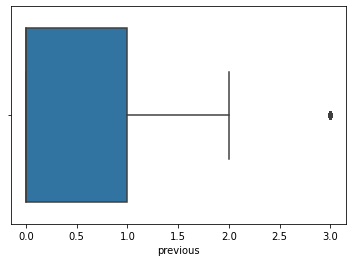

In [59]:
sns.boxplot(df_new['previous']);

### Campaign

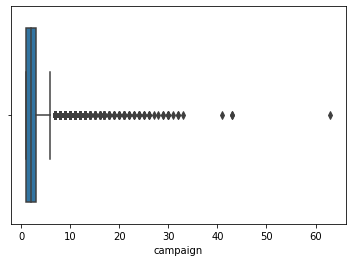

In [60]:
sns.boxplot(df_new['campaign']);

In [61]:
df_new["campaign"] = np.where(df_new["campaign"] <df_new['campaign'].quantile(0.10), df_new['campaign'].quantile(0.10),df_new['campaign'])
df_new["campaign"] = np.where(df_new["campaign"] >df_new['campaign'].quantile(0.90), df_new['campaign'].quantile(0.90),df_new['campaign'])
print(df_new['campaign'].skew())

0.9826361461567283


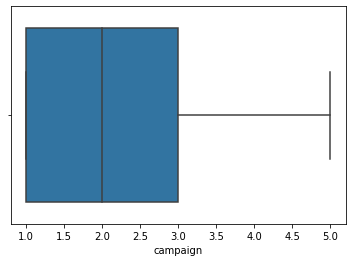

In [62]:
sns.boxplot(df_new['campaign']);

## Drop Kolom/Fitur

In [63]:
df_new.drop(['pdays','previous','month','day'], axis=1,inplace=True)

In [64]:
df_new.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'poutcome', 'deposit'],
      dtype='object')

## OneHotEncoder pada Variabel-Variabel Kategorik

In [65]:
df_new2 = df_new.copy()

### job

In [66]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_new2[['job', 'marital', 'education', 'default','housing','loan','contact','poutcome']]))
df_encoded.columns = encoder.get_feature_names(['job', 'marital', 'education', 'default','housing','loan','contact','poutcome'])

# Replace Categotical Data with Encoded Data
df_new2.drop(['job', 'marital', 'education', 'default','housing','loan','contact','poutcome'] ,axis=1, inplace=True)
df_encoded= pd.concat([df_new2, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

,age,balance,duration,campaign,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2343.0,838.0,1.0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,56.0,45.0,838.0,1.0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41.0,1270.0,838.0,1.0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,55.0,2476.0,579.0,1.0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,54.0,184.0,673.0,2.0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,1.0,257.0,1.0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39.0,733.0,83.0,4.0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11159,32.0,29.0,156.0,2.0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43.0,0.0,77.0,2.0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
dep = df_new2['deposit'].map({'yes':1, 'no':0})

In [68]:
df_encoded.drop('deposit',axis=1)

,age,balance,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2343.0,838.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,56.0,45.0,838.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41.0,1270.0,838.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,55.0,2476.0,579.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,54.0,184.0,673.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,1.0,257.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39.0,733.0,83.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11159,32.0,29.0,156.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43.0,0.0,77.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [69]:
df_encoded['deposit'] = dep

In [70]:
df_encoded

,age,balance,duration,campaign,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2343.0,838.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,56.0,45.0,838.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41.0,1270.0,838.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,55.0,2476.0,579.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,54.0,184.0,673.0,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,1.0,257.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39.0,733.0,83.0,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11159,32.0,29.0,156.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43.0,0.0,77.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Train Test Split

In [71]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('deposit',axis=1)
y = df_encoded['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Decision Tree 

## Training Model

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediksi X_test

In [73]:
predictions = dtree.predict(X_test)

In [78]:
pd.DataFrame({
    'y_true' : y_test,
    'y_pred' : predictions
})

,y_true,y_pred
8096,0,1
8180,0,0
1387,1,1
3047,1,1
4670,1,0
...,...,...
9252,0,0
3197,1,1
4335,1,1
5417,0,0


## Evaluasi Model

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

### Classification Report

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1761
           1       0.73      0.72      0.73      1588

    accuracy                           0.74      3349
   macro avg       0.74      0.74      0.74      3349
weighted avg       0.74      0.74      0.74      3349



### Confusion Matrix

In [79]:
print(confusion_matrix(y_test,predictions))

[[1335  426]
 [ 441 1147]]


### ROC Curve

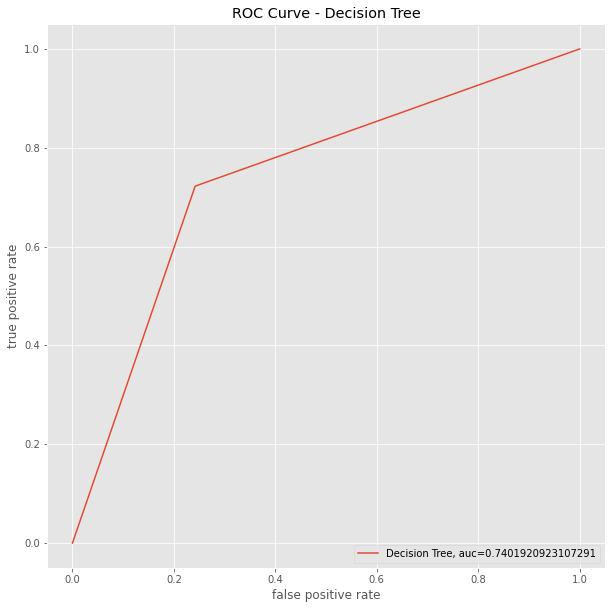

In [82]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_dtc_proba = dtree.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# Random Forest

## Training Model

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc = RandomForestClassifier(600)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Prediksi X_test

In [85]:
predictions = rfc.predict(X_test)

In [88]:
pd.DataFrame({
    'y_true' : y_test,
    'y_pred' : predictions
})

,y_true,y_pred
8096,0,1
8180,0,0
1387,1,1
3047,1,1
4670,1,1
...,...,...
9252,0,0
3197,1,1
4335,1,1
5417,0,0


## Evaluasi Model

### Classification Report

In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1761
           1       0.79      0.83      0.81      1588

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.82      0.81      0.81      3349



### Confusion Matrix

In [87]:
print(confusion_matrix(y_test,predictions))

[[1401  360]
 [ 264 1324]]


### ROC Curve

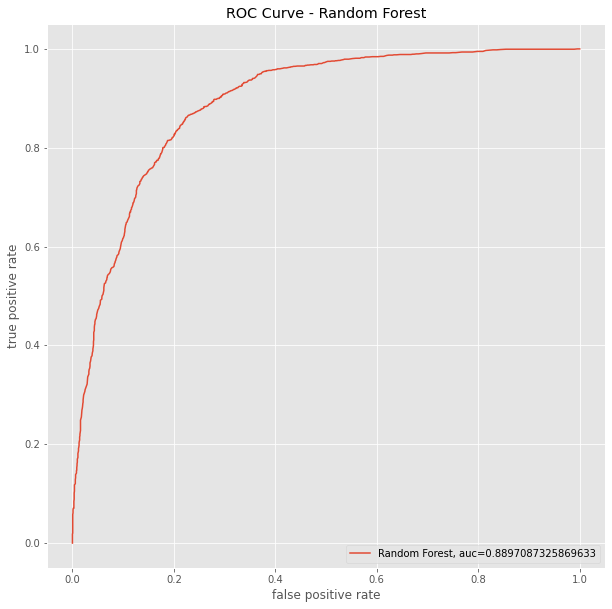

In [90]:
# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_rfc_proba = rfc.predict_proba(X_test)[::,1]
fprrfc, tprrfc, _ = metrics.roc_curve(y_test,  y_pred_rfc_proba)
aucrfc = metrics.roc_auc_score(y_test, y_pred_rfc_proba)
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# Logistic Regression

## Training Model

In [91]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediksi X_test

In [92]:
predictions = logmodel.predict(X_test)
pd.DataFrame({
    'y_true' : y_test,
    'y_pred' : predictions
})

,y_true,y_pred
8096,0,1
8180,0,0
1387,1,1
3047,1,1
4670,1,1
...,...,...
9252,0,0
3197,1,1
4335,1,0
5417,0,0


## Evaluasi Model

### Classification Report

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1761
           1       0.82      0.77      0.80      1588

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



### Confusion Matrix

In [94]:
print(confusion_matrix(y_test,predictions))

[[1486  275]
 [ 358 1230]]


### ROC Curve

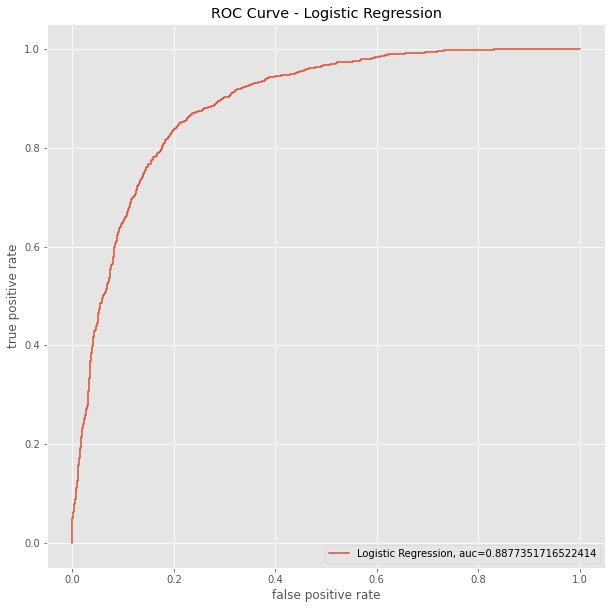

In [96]:
# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_logmodel_proba = logmodel.predict_proba(X_test)[::,1]
fprlogmodel, tprlogmodel, _ = metrics.roc_curve(y_test,  y_pred_logmodel_proba)
auclogmodel = metrics.roc_auc_score(y_test, y_pred_logmodel_proba)
plt.plot(fprlogmodel,tprlogmodel,label="Logistic Regression, auc="+str(auclogmodel))
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# K Nearest Neighbors

## Standarisasi Variabel

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

In [101]:
scaler.fit(df_encoded.drop('deposit',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [102]:
scaled_features = scaler.transform(df_encoded.drop('deposit',axis=1))

In [106]:
df_knn1 = df_encoded.drop('deposit', axis=1)
df_knn1.columns

Index(['age', 'balance', 'duration', 'campaign', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [107]:
df_feat = pd.DataFrame(scaled_features,columns=df_knn1.columns)
df_feat.head()

,age,balance,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.729355,0.950535,1.997251,-0.864963,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.079441,-0.361962,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.215873,0.123617,-0.123617,-1.055280,1.055280,0.387923,-0.387923,-1.605479,-0.272963,1.938527,-0.35159,-0.224814,-0.325782,0.583626
1,1.528570,-0.833229,1.997251,-0.864963,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.079441,-0.361962,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.215873,0.123617,-0.123617,0.947616,-0.947616,0.387923,-0.387923,-1.605479,-0.272963,1.938527,-0.35159,-0.224814,-0.325782,0.583626
2,0.022683,0.117646,1.997251,-0.864963,-0.368422,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,2.263377,-0.18177,-0.079441,-0.361962,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.215873,0.123617,-0.123617,-1.055280,1.055280,0.387923,-0.387923,-1.605479,-0.272963,1.938527,-0.35159,-0.224814,-0.325782,0.583626
3,1.428178,1.053773,0.956415,-0.864963,-0.368422,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,3.330642,-0.182557,-0.441818,-0.18177,-0.079441,-0.361962,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.215873,0.123617,-0.123617,-1.055280,1.055280,0.387923,-0.387923,-1.605479,-0.272963,1.938527,-0.35159,-0.224814,-0.325782,0.583626
4,1.327785,-0.725334,1.334170,-0.119943,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.079441,-0.361962,0.870355,-0.678403,-0.394014,-0.981360,1.423289,-0.215873,0.123617,-0.123617,0.947616,-0.947616,0.387923,-0.387923,-1.605479,-0.272963,1.938527,-0.35159,-0.224814,-0.325782,0.583626


## Train Test Split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_encoded['deposit'],
                                                    test_size=0.30)

## Training Model

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Prediksi X_test

In [113]:
predictions = knn.predict(X_test)
pd.DataFrame({
    'y_true' : y_test,
    'y_pred' : predictions
})

,y_true,y_pred
2997,1,1
9655,0,0
9998,0,0
7396,0,0
489,1,0
...,...,...
5630,0,0
10520,0,0
4546,1,0
1214,1,1


## Evaluasi Model

### Classification Report

In [114]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1786
           1       0.74      0.71      0.72      1563

    accuracy                           0.75      3349
   macro avg       0.75      0.74      0.74      3349
weighted avg       0.75      0.75      0.75      3349



### Confusion Matrix

In [115]:
print(confusion_matrix(y_test,predictions))

[[1392  394]
 [ 457 1106]]


### ROC Curve

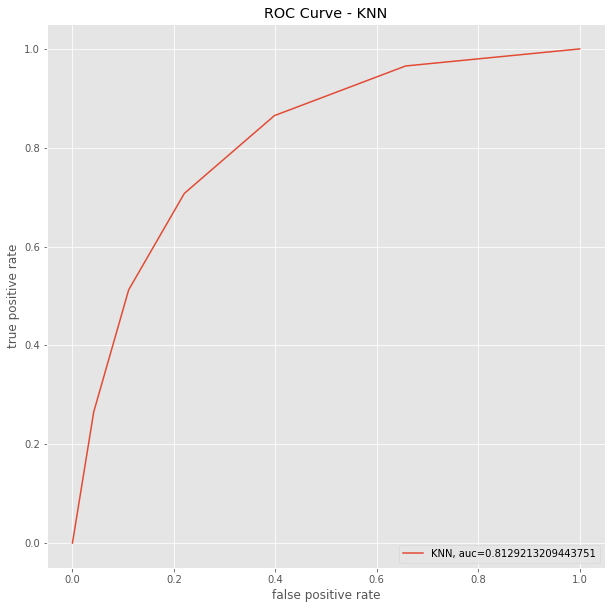

In [116]:
# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_knn_proba = knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve - KNN')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# Membandingkan Model

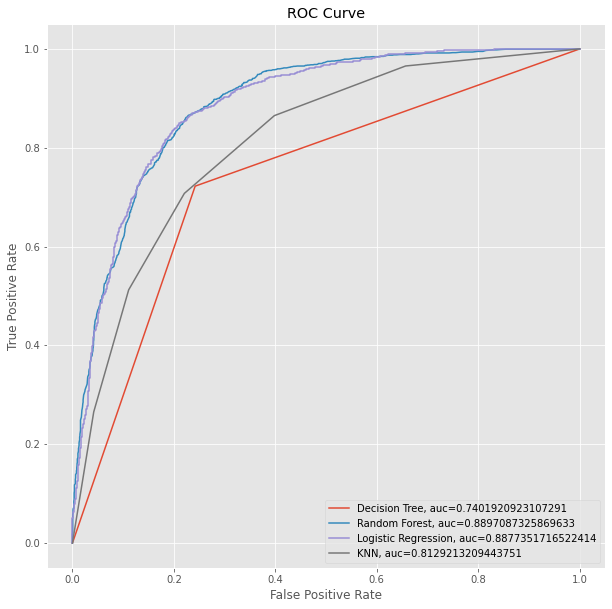

In [119]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.plot(fprlogmodel,tprlogmodel,label="Logistic Regression, auc="+str(auclogmodel))
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()